In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import imblearn
from tensorflow.keras.losses import Loss

tf.config.set_visible_devices([], 'GPU')
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Ucitavanje podataka

In [2]:
url = "datasets/rain_australia/weatherAUS.csv"

df = pd.read_csv(url, sep=",")

In [3]:
df.shape

(145460, 23)

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(145460, 23)

In [5]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru    2.800   23.400     0.000          NaN   
145456  2017-06-22    Uluru    3.600   25.300     0.000          NaN   
145457  2017-06-23    Uluru    5.400   26.900     0.000          NaN   
145458  2017-06-24    Uluru    7.800   27.000     0.000          NaN   
145459  2017-06-25    Uluru   14.900      NaN     0.000          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
145455       NaN           E         31.000         SE        ENE   
145456       NaN         NNW         22.000         SE          N   
145457       NaN           N         37.000         SE        WNW   
145458       NaN          SE         28.000        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
145455        13.000        11.000       51.000       24.000     1024.600   
145456        13.000         9.000       56.000       21.000     1023.500   
145457         9.000         9.000       53.000       24.000     1021.000   
145458        13.000         7.000       51.000       24.000     1019.400   
145459        17.000        17.000       62.000       36.000     1020.200   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
145455     1020.300       NaN       NaN   10.100   22.400        No   
145456     1019.100       NaN       NaN   10.900   24.500        No   
145457     1016.800       NaN       NaN   12.500   26.100        No   
145458     1016.500     3.000     2.000   15.100   26.000        No   
145459     1017.900     8.000     8.000   15.000   20.900        No   

       RainTomorrow  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Deskriptivna analiza, pretprocesiranje

In [7]:
df = df.dropna(subset=["RainTomorrow"])
print(df.shape)
df = df.dropna(axis=0, thresh=df.shape[1] - 10)
print(df.shape)

(142193, 23)
(140398, 23)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140398 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140398 non-null  object 
 1   Location       140398 non-null  object 
 2   MinTemp        140131 non-null  float64
 3   MaxTemp        140217 non-null  float64
 4   Rainfall       139237 non-null  float64
 5   Evaporation    81105 non-null   float64
 6   Sunshine       74348 non-null   float64
 7   WindGustDir    132673 non-null  object 
 8   WindGustSpeed  132730 non-null  float64
 9   WindDir9am     131683 non-null  object 
 10  WindDir3pm     138172 non-null  object 
 11  WindSpeed9am   140022 non-null  float64
 12  WindSpeed3pm   139307 non-null  float64
 13  Humidity9am    139128 non-null  float64
 14  Humidity3pm    137852 non-null  float64
 15  Pressure9am    128105 non-null  float64
 16  Pressure3pm    128089 non-null  float64
 17  Cloud9am       87768 non-null   fl

In [9]:
df.describe()

MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count 140131.000 140217.000 139237.000    81105.000 74348.000     132730.000   
mean      12.189     23.232      2.342        5.468     7.625         39.979   
std        6.403      7.116      8.427        4.190     3.781         13.585   
min       -8.500     -4.800      0.000        0.000     0.000          6.000   
25%        7.600     17.900      0.000        2.600     4.900         31.000   
50%       12.000     22.600      0.000        4.800     8.500         39.000   
75%       16.800     28.300      0.800        7.400    10.600         48.000   
max       33.900     48.100    371.000      145.000    14.500        135.000   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count    140022.000    139307.000   139128.000   137852.000   128105.000   
mean         14.032        18.642       68.824       51.475     1017.653   
std           8.867         8.802       19.074       20.793        7.105   
min           0.000         0.000        0.000        0.000      980.500   
25%           7.000        13.000       57.000       37.000     1012.900   
50%          13.000        19.000       70.000       52.000     1017.600   
75%          19.000        24.000       83.000       66.000     1022.400   
max          87.000        87.000      100.000      100.000     1041.000   

       Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
count   128089.000 87768.000 85033.000 139974.000 138722.000  
mean      1015.258     4.440     4.503     16.983     21.695  
std          7.036     2.885     2.721      6.500      6.933  
min        977.100     0.000     0.000     -7.200     -5.400  
25%       1010.400     1.000     2.000     12.300     16.600  
50%       1015.200     5.000     5.000     16.700     21.100  
75%       1020.000     7.000     7.000     21.600     26.400  
max       1039.600     9.000     9.000     40.200     46.700

In [10]:
df["RainToday"].value_counts()

RainToday
No     108133
Yes     31104
Name: count, dtype: int64

In [11]:
df["RainTomorrow"].value_counts()

RainTomorrow
No     108961
Yes     31437
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Attribute - RainTomorrow')

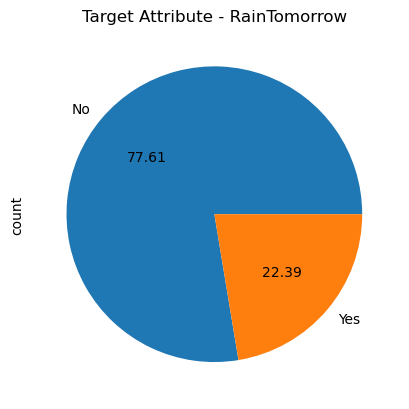

In [12]:
df["RainTomorrow"].value_counts().plot(kind="pie", autopct="%2.2f")
plt.title("Target Attribute - RainTomorrow")

In [13]:
df[df["RainToday"] != df["RainTomorrow"]].shape[0]

34245

/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


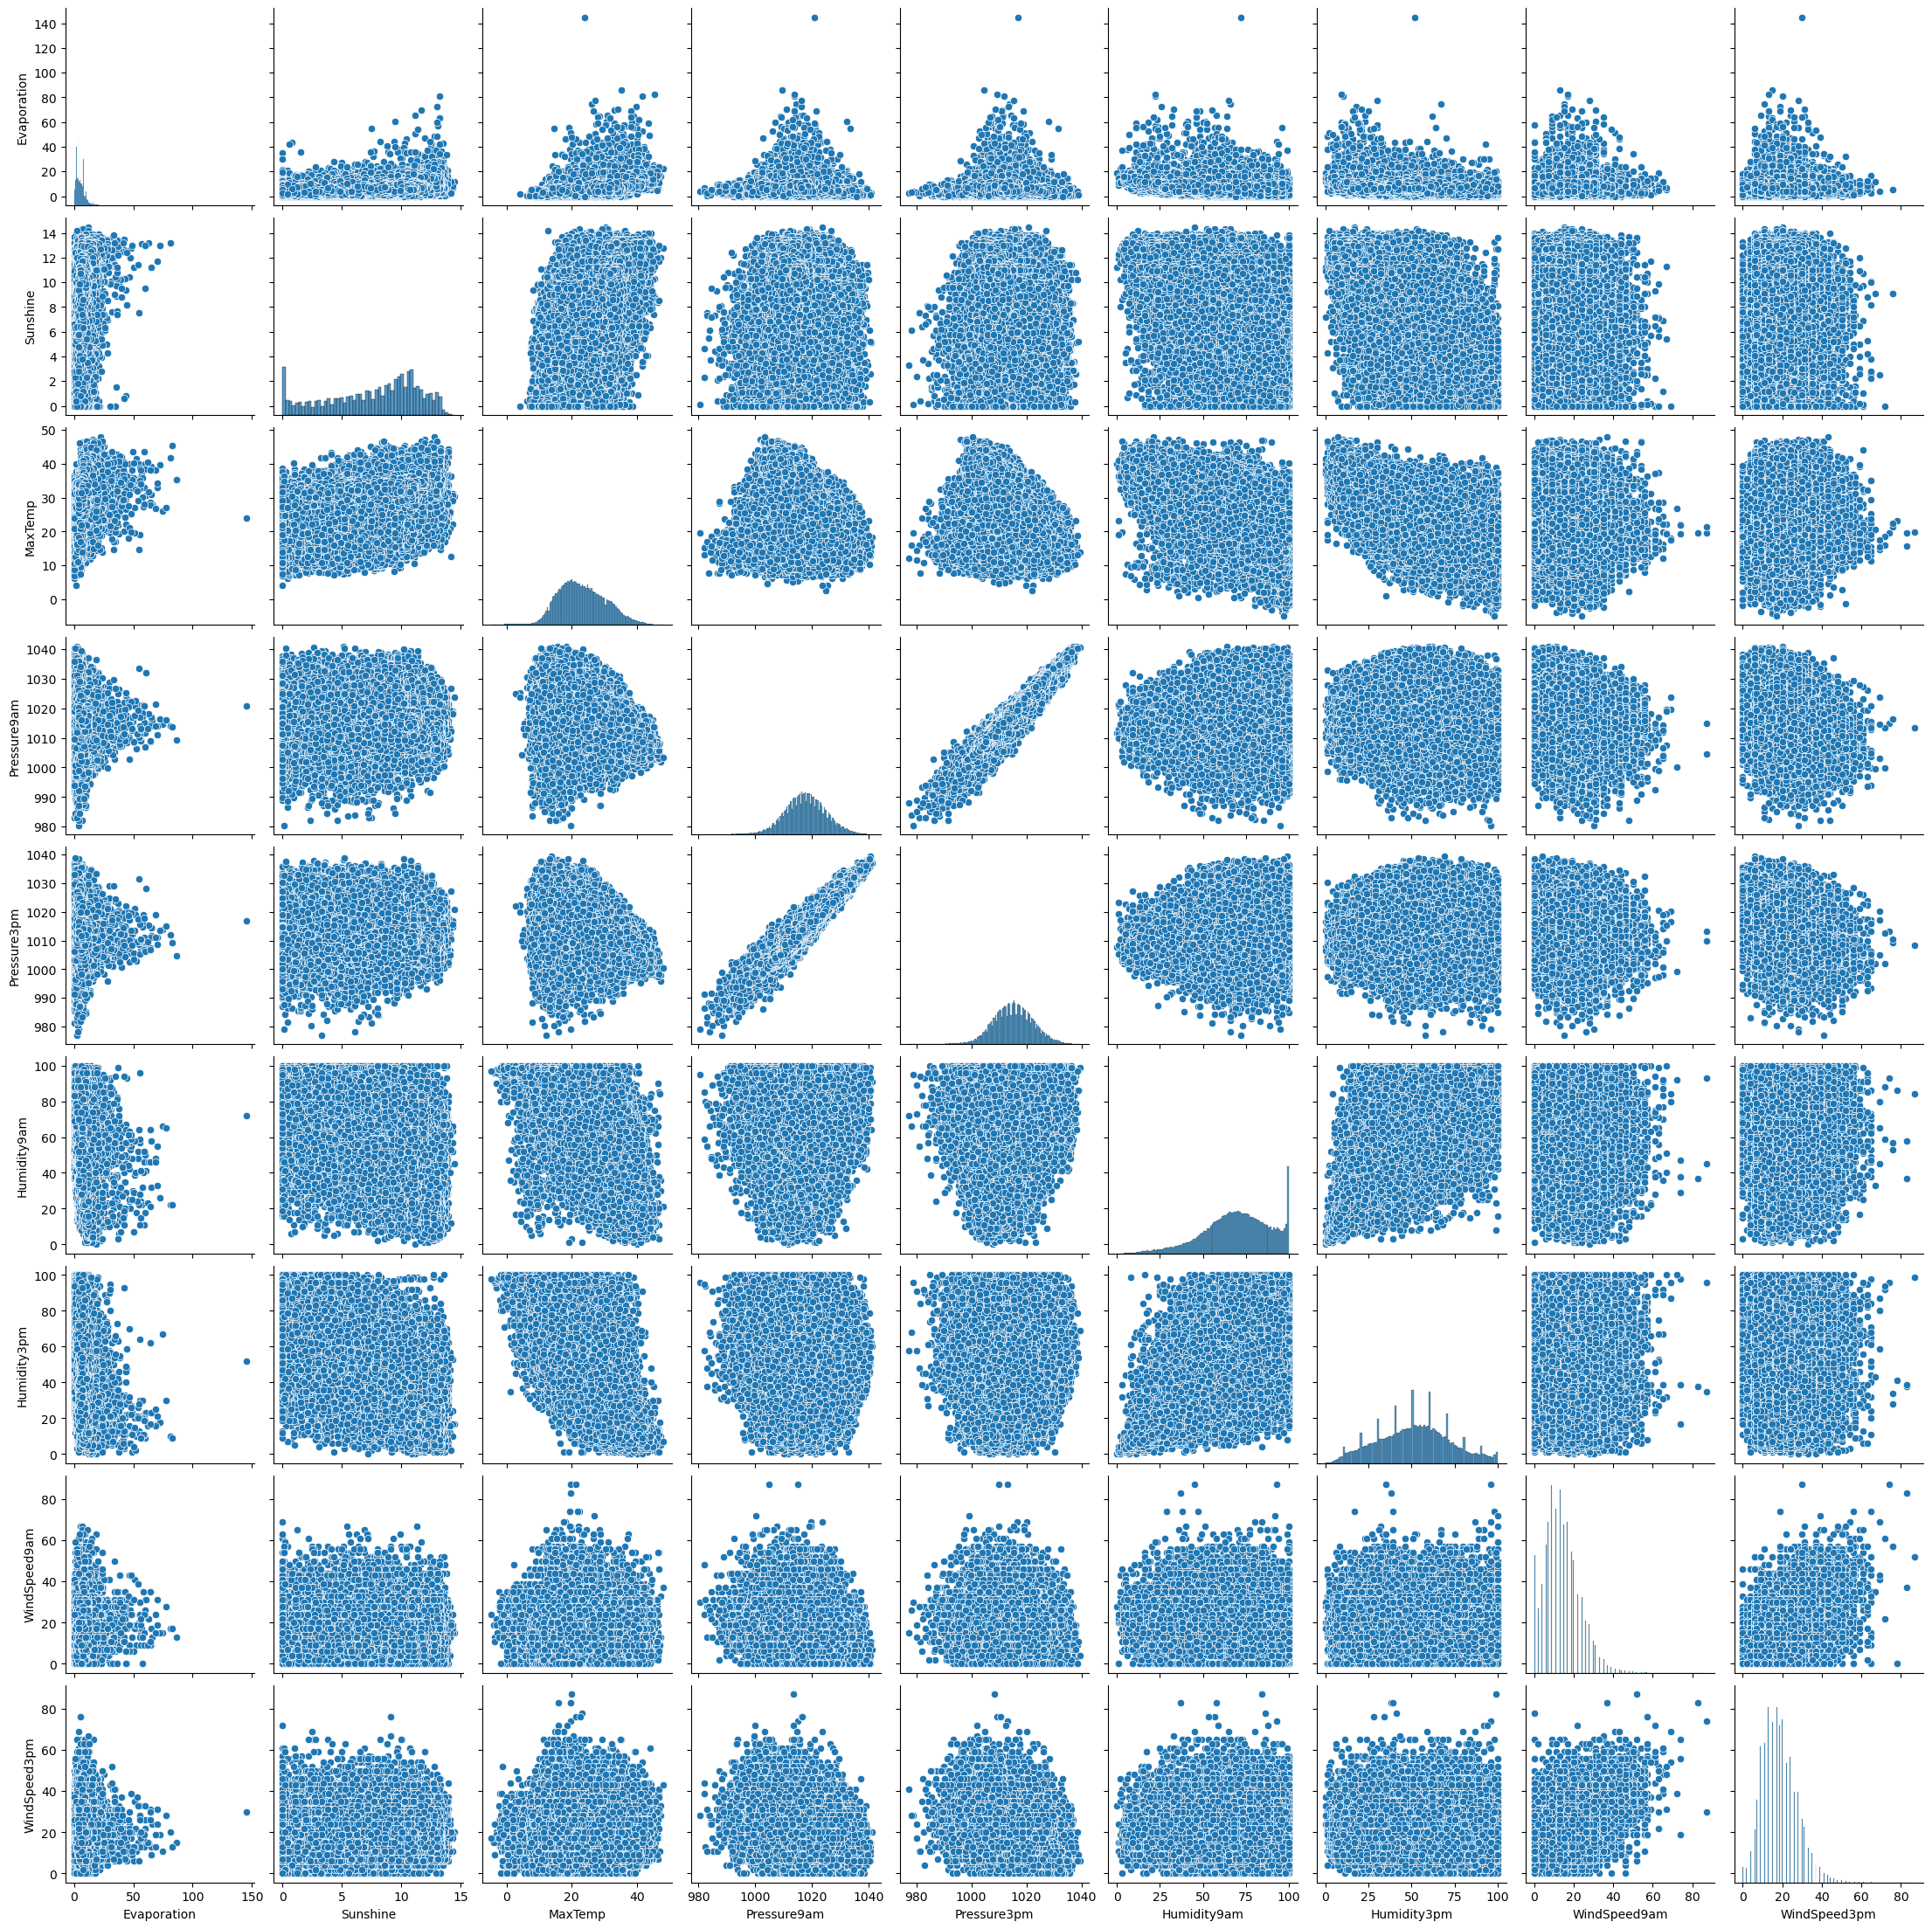

In [14]:
attrs = ["Evaporation", "Sunshine", "MaxTemp", "Pressure9am", "Pressure3pm", "Humidity9am", "Humidity3pm", "WindSpeed9am", "WindSpeed3pm"]

sns.pairplot(df[attrs])

<Axes: >

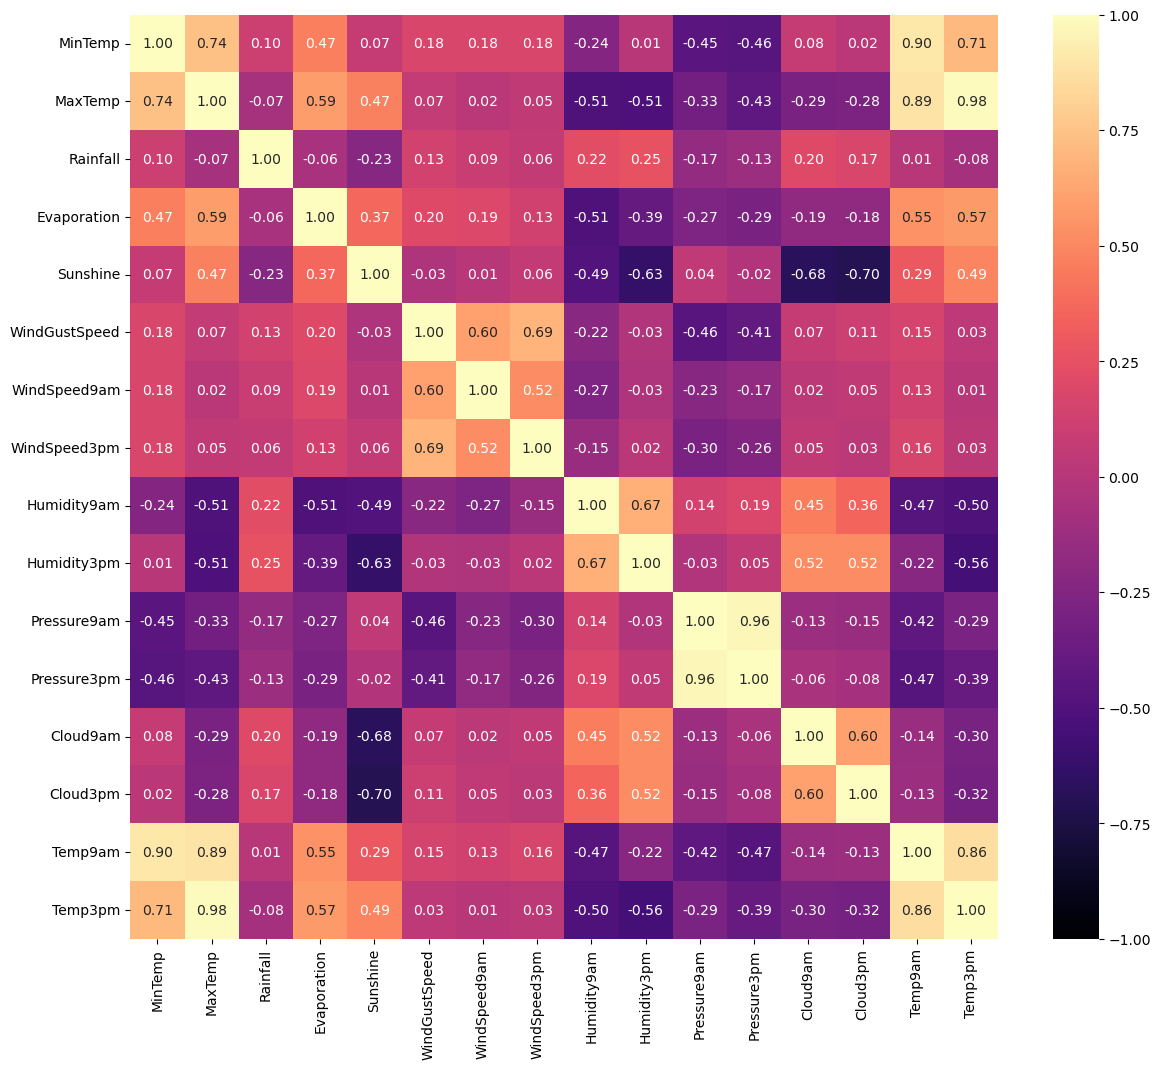

In [15]:
plt.figure(figsize=(14, 12))

num_cols = df.select_dtypes(include=["float64"]).columns
sns.heatmap(df[num_cols].corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cbar=True, cmap="magma")

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

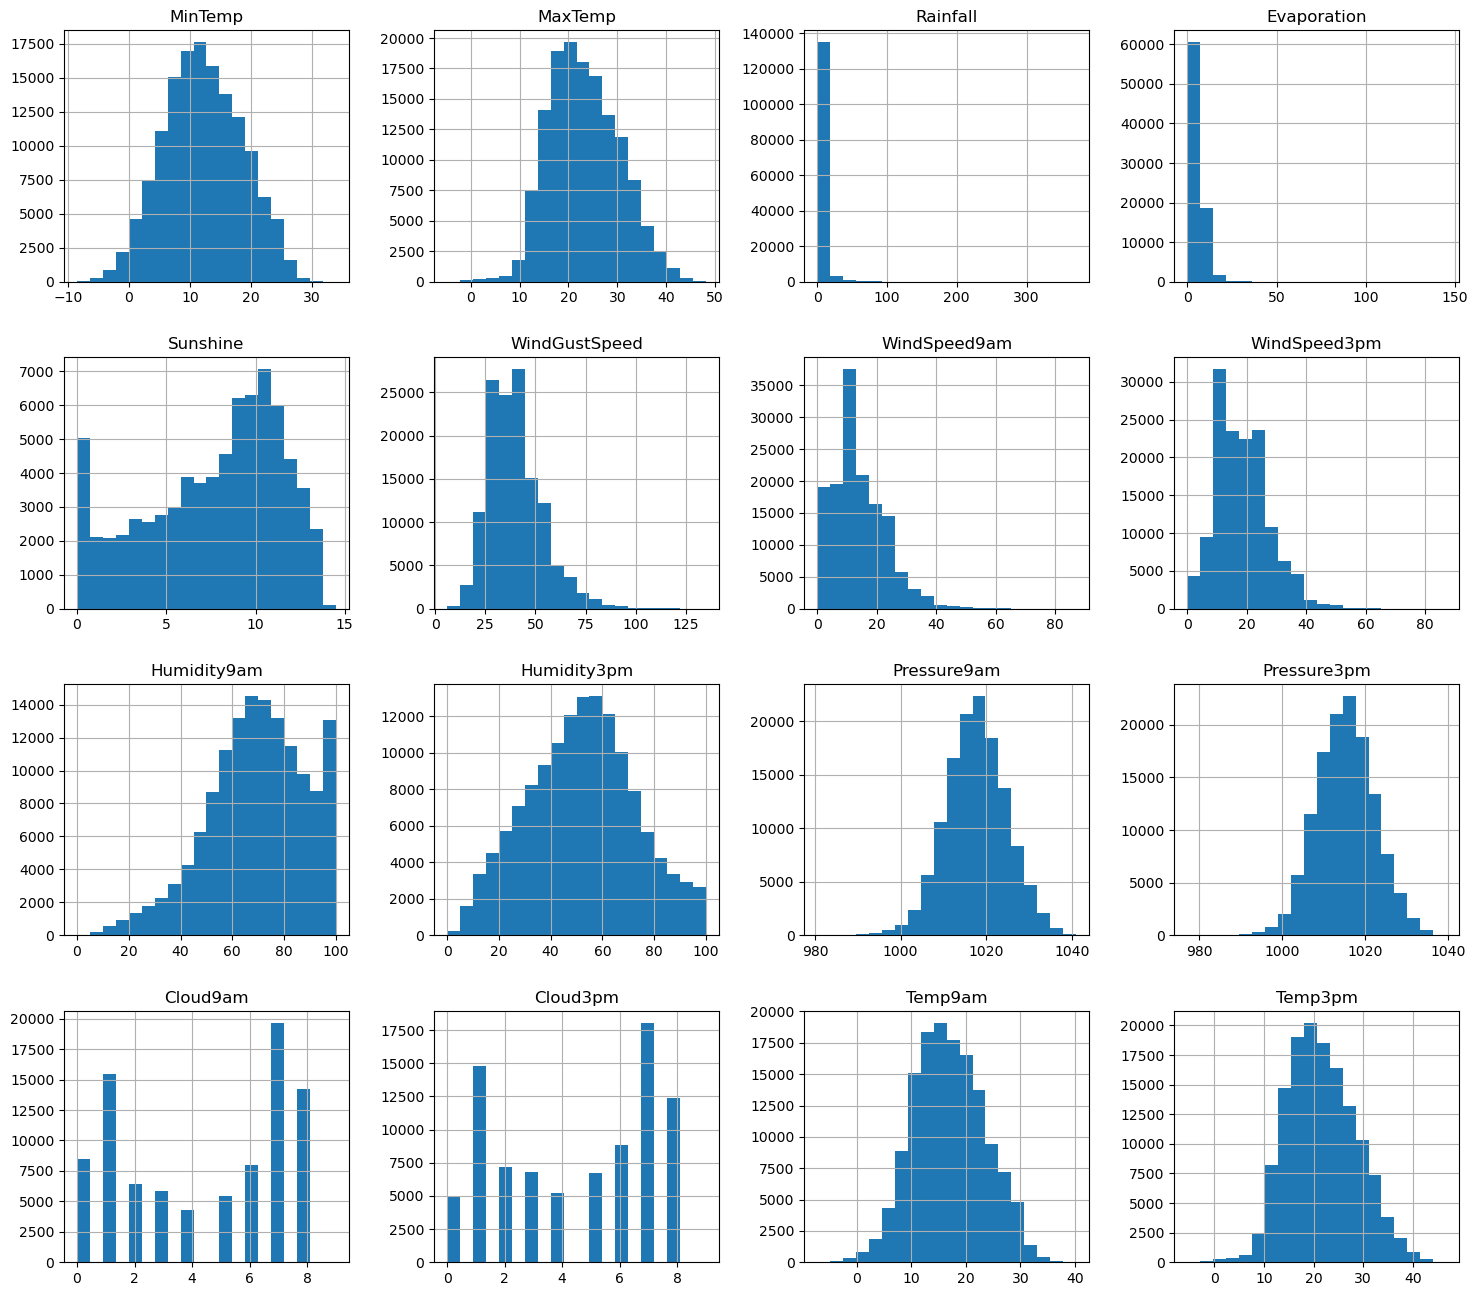

In [16]:
df.hist(figsize=(18, 16), bins=20)

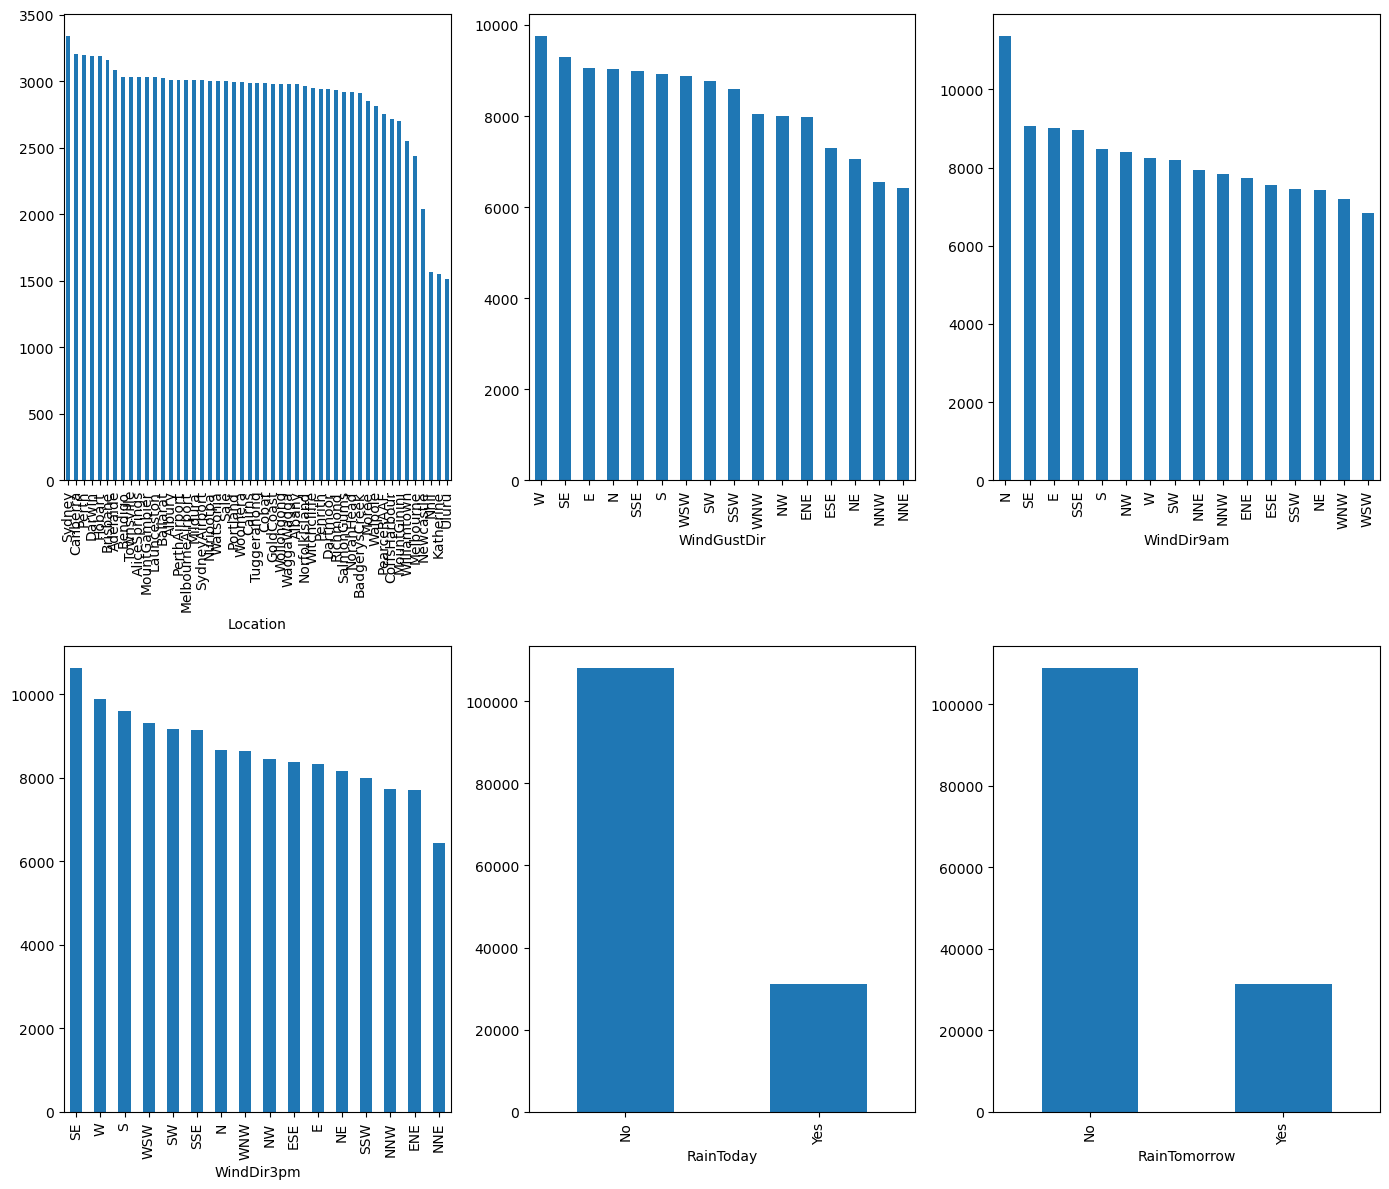

In [17]:
cat_cols = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
fig, ax = plt.subplots(2, 3, figsize=(14, 12))
ax = ax.flatten()


for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind="bar", ax=ax[i])

fig.tight_layout()

Zbog visoke korelacije brisemo atribute Temp9am, Temp3pm (visoka korelacija sa MinTemp i MaxTemp) i Pressure9am(Visoka korelacija sa Pressure3pm).

In [18]:
df.drop(["Temp9am", "Temp3pm", "Pressure9am"], axis=1, inplace=True)

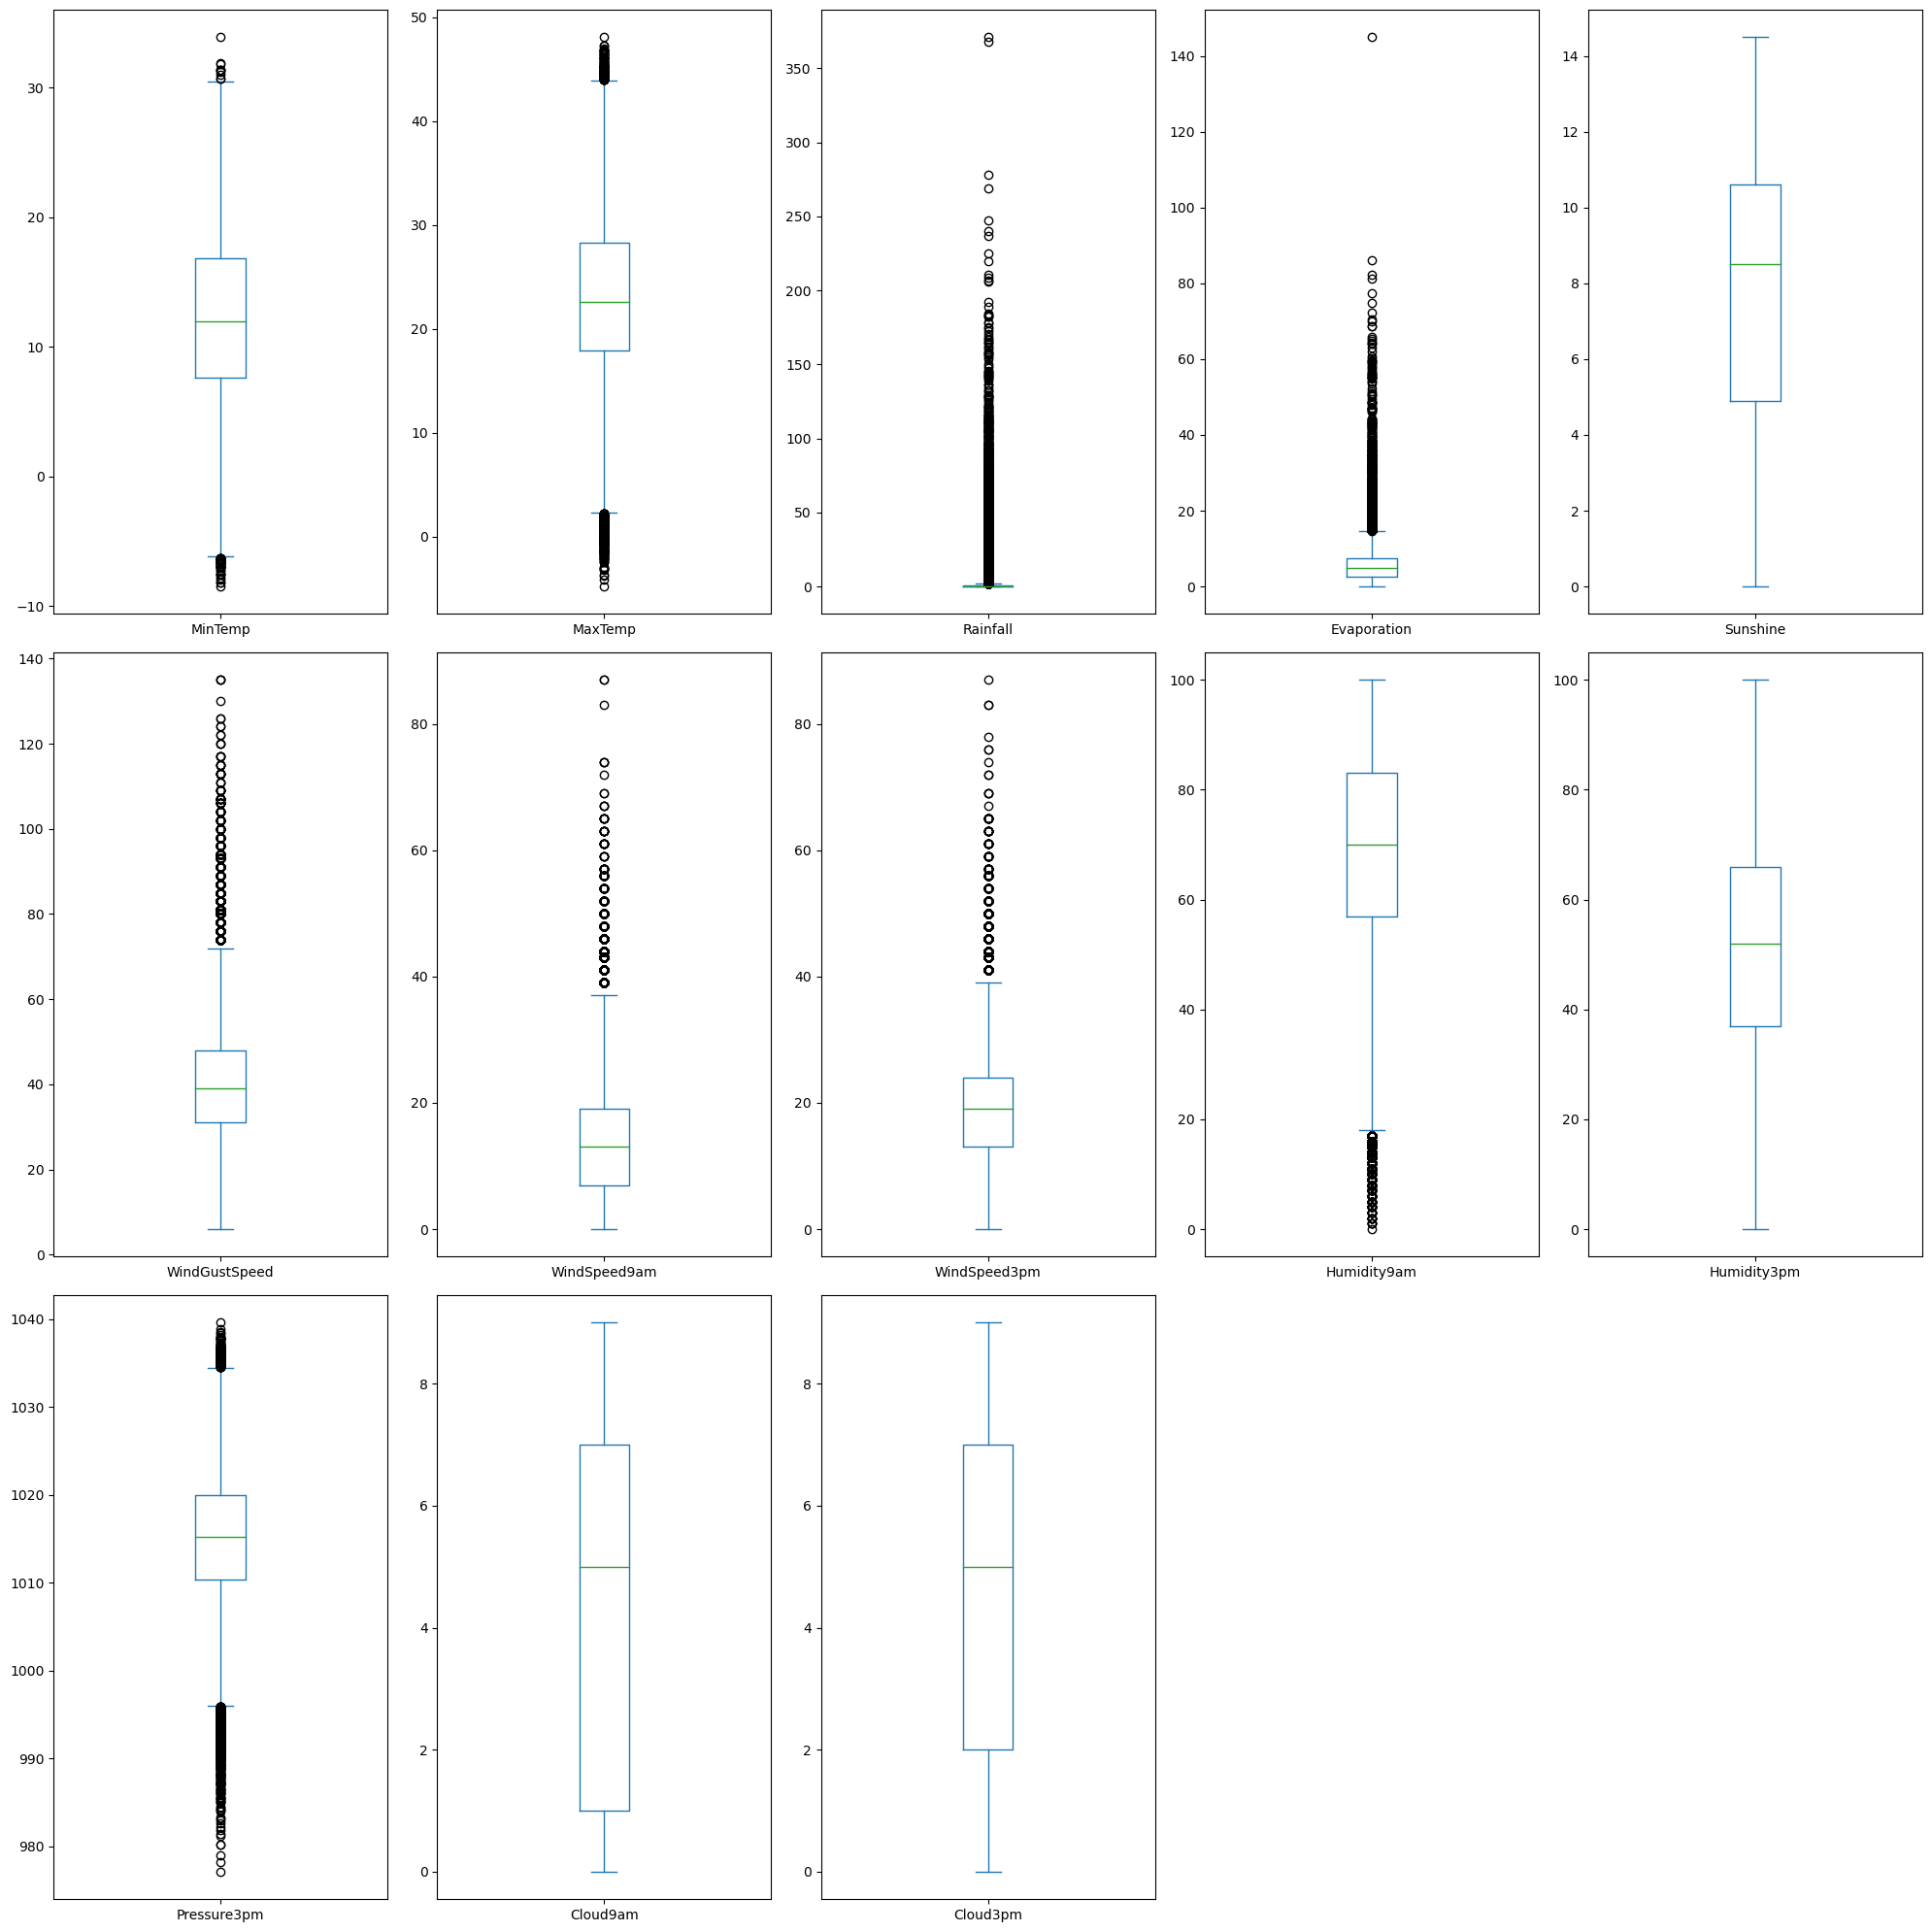

In [19]:
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.select_dtypes(include=["float64"]).columns):
    df[col].plot(kind="box", ax=ax[i])

fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
fig.tight_layout()

Brisemo samo najistaknutije outlier-e.

In [20]:
outlier_indicies = df[(df["Evaporation"] > 100.) | (df["Rainfall"] > 300.)].index

df.drop(outlier_indicies, axis=0, inplace=True)

In [21]:
df.groupby("Location").count()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                                    
Adelaide          3087     3086     3086      3019         1648      1698   
Albany            2975     2951     2946      2974         2715      2497   
Albury            3010     3004     3009      2990            0         0   
AliceSprings      3030     3029     3029      3025         2820      2520   
BadgerysCreek     2910     2903     2908      2875            0         0   
Ballarat          3026     3025     3025      3015            0         0   
Bendigo           3034     3033     3033      3030         1185         0   
Brisbane          3161     3155     3157      3132         3142      3113   
Cairns            2988     2987     2988      2964         2647      2562   
Canberra          3206     3206     3206      3190         1612      1512   
Cobar             2982     2981     2982      2974         2653       550   
CoffsHarbour      2715     2713     2709      2707         1780      1490   
Dartmoor          2942     2937     2942      2939         2534      2500   
Darwin            3191     3190     3191      3191         3138      3188   
GoldCoast         2980     2979     2979      2924            0         0   
Hobart            3188     3188     3187      3183         3181      3174   
Katherine         1550     1515     1528      1545         1473         0   
Launceston        3027     3024     3025      3019          141         0   
Melbourne         2434     2434     2434      2298         2434      2433   
MelbourneAirport  3009     3009     3009      3009         3006      3008   
Mildura           3007     3007     3007      3005         2890      2875   
Moree             2853     2851     2853      2791         2236      2053   
MountGambier      3029     3028     3028      3021         2629      2596   
MountGinini       2703     2703     2702      2691            0         0   
Newcastle         2039     1975     1977      2038            0         0   
Nhil              1569     1569     1569      1565            0         0   
NorahHead         2915     2909     2912      2888            0         0   
NorfolkIsland     2964     2963     2964      2944         2756      2570   
Nuriootpa         3001     2990     2994      2996         2880      2845   
PearceRAAF        2750     2735     2743      2637            0      2745   
Penrith           2942     2936     2942      2910            0         0   
Perth             3193     3193     3192      3193         3192      3188   
PerthAirport      3009     3009     3009      3009         3008      3004   
Portland          2996     2987     2995      2984         2589      2555   
Richmond          2935     2927     2931      2904         1595         0   
Sale              2999     2998     2998      2991         1834      1818   
SalmonGums        2917     2913     2914      2906            0         0   
Sydney            3337     3334     3335      3331         3286      3321   
SydneyAirport     3005     3004     3005      3001         2959      2989   
Townsville        3033     3031     3033      3027         2944      2616   
Tuggeranong       2983     2983     2982      2959            0         0   
Uluru             1516     1515     1516      1502            0         0   
WaggaWagga        2976     2976     2976      2958         2853      2575   
Walpole           2813     2802     2808      2767            0         0   
Watsonia          2999     2993     2999      2990         2996      2998   
Williamtown       2549     2548     2548      2372         1784      1350   
Witchcliffe       2951     2944     2947      2924            0         0   
Wollongong        2977     2970     2974      2943            0         0   
Woomera           2990     2986     2988      2984         2564      2003   

                  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location          

Na osnovu tabele iznad, vidimo da se vecina nedostajucih vrednosti javlja zbog toga sto u pojedinim stanicama nemamo mogucnost merenja svih parametara. Ovaj problem cemo pokusati da resimo na par nacina. Dodajemo kolonu Location_Grouped, koja ce geografski bliske vremenske stanice da grupise u jednu.

In [22]:
def loc_area(loc):
    loc_dict = {
        "ACT": ["Canberra", "Tuggeranong", "MountGinini"],
        "NSouthWales": ["Albury", "BadgerysCreek", "Cobar", "CoffsHarbour", "Moree", "Newcastle", "NorahHead", "NorfolkIsland", "Penrith", "Sydney", "SydneyAirport", "WaggaWagga", "Williamtown", "Wollongong"],
        "Victoria": ["Ballarat", "Bendigo", "Dartmoor", "Melbourne", "MelbourneAirport", "Mildura", "Nhil", "Portland", "Sale", "Watsonia"],
        "Queensland": ["Brisbane", "Cairns", "GoldCoast", "Richmond", "Townsville"],
        "SouthAustralia": ["Adelaide", "MountGambier", "Nuriootpa", "Woomera"],
        "WesternAustralia": ["Albany", "PearceRAAF", "Perth", "PerthAirport", "SalmonGums", "Walpole", "Witchcliffe"],
        "Tasmania": ["Hobart", "Launceston"],
        "NorthernTerritory": ["AliceSprings", "Darwin", "Katherine", "Uluru"],
        "OffshoreIslands": ["NorfolkIsland"]
    }
    reg = [key for key in loc_dict if loc in loc_dict[key]]
    return reg[0] if len(reg) > 0 else "Unknown"

df["Location_Grouped"] = df["Location"].apply(lambda loc: loc_area(loc))

In [23]:
df["Location_Grouped"].value_counts()

Location_Grouped
NSouthWales          40174
Victoria             28015
WesternAustralia     20608
Queensland           15097
SouthAustralia       12107
NorthernTerritory     9287
ACT                   8892
Tasmania              6215
Name: count, dtype: int64

Date pretvaramo u dva nova atributa - Mesec i Godina jer ovi atributi potencijalno mogu biti znacajniji za predikciju kise. Oba atributa transformisemo u dva "podatributa" koriscenjem sinusne i kosinusne funkcije, kako bi se ocuvala ciklicna priroda ova dva atributa (kada bismo samo kodirali vrednosti za mesec brojevima, ne bi se zadrzalo svojstvo da je npr. mesec januar blizi decembru nego recimo aprilu).

In [24]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df["Day"] = pd.to_datetime(df["Date"]).dt.day

df["Month_sin"] = df["Month"].apply(lambda month: np.float32(np.sin(2 * np.pi * month / 12)))
df["Month_cos"] = df["Month"].apply(lambda month: np.float32(np.cos(2 * np.pi * month / 12)))

df["Day_sin"] = df["Day"].apply(lambda day: np.float32(np.sin(2 * np.pi * day / 31)))
df["Day_cos"] = df["Day"].apply(lambda day: np.float32(np.cos(2 * np.pi * day / 31)))

df.drop("Date", axis=1, inplace=True)

### 1. Brisanje kolona sa velikim brojem nedostajucih vrednosti, popunjavamo ostale na osnovu poznatih vrednosti za datu lokaciju

In [25]:
df_imputed_loc = df.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1)

Atributi Rainfall i RainToday daju istu informaciju (Rainfall >= 1.0 <=> RainToday == "Yes"), zbog toga cemo obrisati jednu od ove dve kolone. <br>
Na kraju je izbrisan atribut Rainfall jer smo njegovim brisanjem dobili bolje rezultate.

In [26]:
df_imputed_loc[(df_imputed_loc["Rainfall"] > 1.0) & (df_imputed_loc["RainToday"] == "No")].shape[0]

0

In [27]:
df_imputed_loc[(df_imputed_loc["Rainfall"].isnull()) & (df_imputed_loc["RainToday"].notnull())].shape[0]

0

In [28]:
df_imputed_loc[(df_imputed_loc["Rainfall"].notnull()) & (df_imputed_loc["RainToday"].isnull())].shape[0]

0

In [29]:
df_imputed_loc = df_imputed_loc.drop(["Rainfall"], axis=1)

In [30]:
cols_mean_imputer = ["MinTemp", "MaxTemp", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure3pm"] #"Temp9am", "Temp3pm", "Pressure9am",]

for col in cols_mean_imputer:
    df_imputed_loc[col] = df_imputed_loc[col].fillna(df_imputed_loc.groupby(["Location", "Month"])[col].transform("median"))

In [31]:
cols_mode_imputer = ["WindGustDir", "WindDir9am", "WindDir3pm", "WindGustDir"] #, "Rainfall"]

for col in cols_mode_imputer:
    modes = df_imputed_loc.groupby(["Location", "Month"])[col].agg(pd.Series.mode)
    mode = modes.iloc[0]
    df_imputed_loc[col] = df_imputed_loc[col].fillna(str(mode))

In [32]:
#df_imputed_loc["Rainfall"] = df_imputed_loc["Rainfall"].astype("float64")

In [33]:
df_imputed_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140395 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          140395 non-null  object 
 1   MinTemp           140395 non-null  float64
 2   MaxTemp           140395 non-null  float64
 3   WindGustDir       140395 non-null  object 
 4   WindGustSpeed     135381 non-null  float64
 5   WindDir9am        140395 non-null  object 
 6   WindDir3pm        140395 non-null  object 
 7   WindSpeed9am      140395 non-null  float64
 8   WindSpeed3pm      140395 non-null  float64
 9   Humidity9am       140395 non-null  float64
 10  Humidity3pm       140395 non-null  float64
 11  Pressure3pm       129794 non-null  float64
 12  RainToday         139234 non-null  object 
 13  RainTomorrow      140395 non-null  object 
 14  Location_Grouped  140395 non-null  object 
 15  Month             140395 non-null  int32  
 16  Day               140395 

In [34]:
cols_mean_imputer = ["MinTemp", "MaxTemp", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure3pm"] #"Temp9am", "Temp3pm", "Pressure9am",]

for col in cols_mean_imputer:
    df_imputed_loc[col] = df_imputed_loc[col].fillna(df_imputed_loc.groupby(["Location_Grouped", "Month"])[col].transform("median"))

In [35]:
cols_mode_imputer = ["WindGustDir", "WindDir9am", "WindDir3pm", "WindGustDir"]# , "Rainfall"]

for col in cols_mode_imputer:
    modes = df_imputed_loc.groupby(["Location_Grouped", "Month"])[col].agg(pd.Series.mode)
    mode = modes.iloc[0]
    df_imputed_loc[col] = df_imputed_loc[col].fillna(str(mode))

In [36]:
df_imputed_loc = df_imputed_loc.dropna(axis=0)

In [37]:
df_imputed_loc.drop(["Location_Grouped", "Day", "Month"], inplace=True, axis=1)
df_imputed_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139234 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       139234 non-null  object 
 1   MinTemp        139234 non-null  float64
 2   MaxTemp        139234 non-null  float64
 3   WindGustDir    139234 non-null  object 
 4   WindGustSpeed  139234 non-null  float64
 5   WindDir9am     139234 non-null  object 
 6   WindDir3pm     139234 non-null  object 
 7   WindSpeed9am   139234 non-null  float64
 8   WindSpeed3pm   139234 non-null  float64
 9   Humidity9am    139234 non-null  float64
 10  Humidity3pm    139234 non-null  float64
 11  Pressure3pm    139234 non-null  float64
 12  RainToday      139234 non-null  object 
 13  RainTomorrow   139234 non-null  object 
 14  Month_sin      139234 non-null  float32
 15  Month_cos      139234 non-null  float32
 16  Day_sin        139234 non-null  float32
 17  Day_cos        139234 non-null  fl

Transformisemo raspodele da budu slicnije Gausovoj raspodeli.

In [38]:
for col in df_imputed_loc.select_dtypes(include=["float64"]).columns:
    print(f'{col} skew = {df_imputed_loc[col].skew()}')

MinTemp skew = 0.029829889905354286
MaxTemp skew = 0.23360525456307263
WindGustSpeed skew = 0.9065825482062946
WindSpeed9am skew = 0.75758075383017
WindSpeed3pm skew = 0.6328297892616462
Humidity9am skew = -0.4849751268323327
Humidity3pm skew = 0.02716877717658487
Pressure3pm skew = -0.07238946109229803


In [39]:
left_skewed = ["Humidity9am"]
right_skewed = ["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]

for l_col in left_skewed:
    df_imputed_loc[l_col] = df_imputed_loc[l_col].apply(lambda x: np.power(x, 2))

for r_col in right_skewed:
    df_imputed_loc[r_col] = df_imputed_loc[r_col].apply(lambda x: np.power(x, 0.7))

In [40]:
for col in df_imputed_loc.select_dtypes(include=["float64"]).columns:
    print(f'{col} skew = {df_imputed_loc[col].skew()}')

MinTemp skew = 0.029829889905354286
MaxTemp skew = 0.23360525456307263
WindGustSpeed skew = 0.5479430931203345
WindSpeed9am skew = 0.055649198848605204
WindSpeed3pm skew = 0.11757110235215573
Humidity9am skew = 0.18864209504760177
Humidity3pm skew = 0.02716877717658487
Pressure3pm skew = -0.07238946109229803


array([[<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'WindGustSpeed'}>],
       [<Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>]], dtype=object)

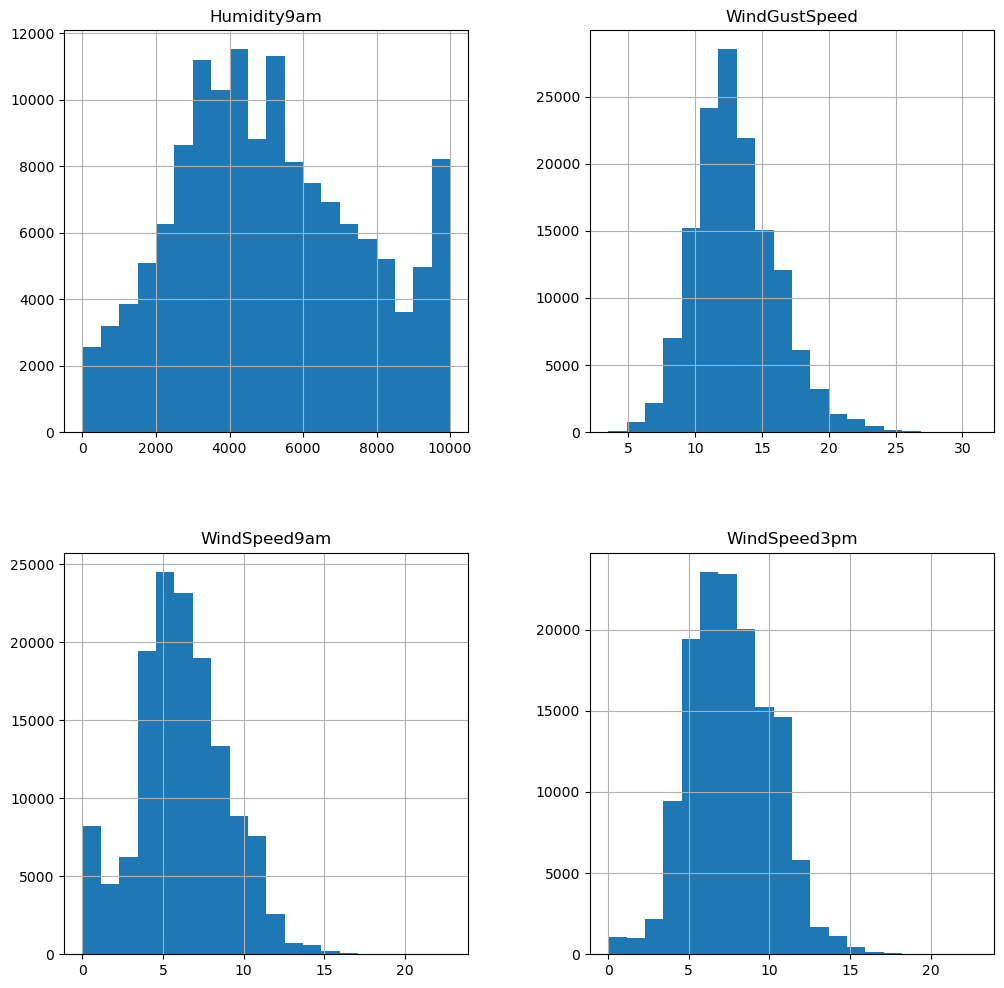

In [41]:
df_imputed_loc[left_skewed + right_skewed].hist(figsize=(12, 12), bins=20)

### 2. KNN Imputer

In [439]:
df_imputed_knn = df.copy(deep = True)

In [440]:
df_imputed_knn.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury   13.400   22.900     0.600          NaN       NaN           W   
1   Albury    7.400   25.100     0.000          NaN       NaN         WNW   
2   Albury   12.900   25.700     0.000          NaN       NaN         WSW   
3   Albury    9.200   28.000     0.000          NaN       NaN          NE   
4   Albury   17.500   32.300     1.000          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         44.000          W        WNW        20.000        24.000   
1         44.000        NNW        WSW         4.000        22.000   
2         46.000          W        WSW        19.000        26.000   
3         24.000         SE          E        11.000         9.000   
4         41.000        ENE         NW         7.000        20.000   

   Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm RainToday  \
0       71.000       22.000     1007.100     8.000       NaN        No   
1       44.000       25.000     1007.800       NaN       NaN        No   
2       38.000       30.000     1008.700       NaN     2.000        No   
3       45.000       16.000     1012.800       NaN       NaN        No   
4       82.000       33.000     1006.000     7.000     8.000        No   

  RainTomorrow Location_Grouped  Month  Day  Month_sin  Month_cos  Day_sin  \
0           No      NSouthWales     12    1     -0.000      1.000    0.201   
1           No      NSouthWales     12    2     -0.000      1.000    0.394   
2           No      NSouthWales     12    3     -0.000      1.000    0.571   
3           No      NSouthWales     12    4     -0.000      1.000    0.725   
4           No      NSouthWales     12    5     -0.000      1.000    0.849   

   Day_cos  
0    0.980  
1    0.919  
2    0.821  
3    0.689  
4    0.529

In [441]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")

num_cols = df_imputed_knn.select_dtypes(include=["float64"]).columns
imputed_data = imputer.fit_transform(df_imputed_knn[num_cols])

In [442]:
imputed_data_df = pd.DataFrame(imputed_data, columns=imputer.get_feature_names_out())

for col in num_cols:
    df_imputed_knn[col] = imputed_data_df[col].values

In [443]:
cat_cols = ["WindGustDir", "WindDir9am", "WindDir3pm"]

for col in cat_cols:
    df_imputed_knn[col] = df_imputed_knn[col].fillna(df_imputed_knn[col].mode()[0])

In [444]:
df_imputed_knn.dropna(axis=0, inplace=True)
df_imputed_knn.drop(["Location_Grouped", "Day", "Month"], axis=1, inplace=True)

In [445]:
df_imputed_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139234 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       139234 non-null  object 
 1   MinTemp        139234 non-null  float64
 2   MaxTemp        139234 non-null  float64
 3   Rainfall       139234 non-null  float64
 4   Evaporation    139234 non-null  float64
 5   Sunshine       139234 non-null  float64
 6   WindGustDir    139234 non-null  object 
 7   WindGustSpeed  139234 non-null  float64
 8   WindDir9am     139234 non-null  object 
 9   WindDir3pm     139234 non-null  object 
 10  WindSpeed9am   139234 non-null  float64
 11  WindSpeed3pm   139234 non-null  float64
 12  Humidity9am    139234 non-null  float64
 13  Humidity3pm    139234 non-null  float64
 14  Pressure3pm    139234 non-null  float64
 15  Cloud9am       139234 non-null  float64
 16  Cloud3pm       139234 non-null  float64
 17  RainToday      139234 non-null  ob

## Klasifikacija

In [42]:
oh_enc = OneHotEncoder(drop="if_binary")
num_sc = RobustScaler() #StandardScaler() 

num_pipeline = make_pipeline(num_sc)
cat_pipeline = make_pipeline(oh_enc)

tr = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=["float64"])),
    ("cat", cat_pipeline, make_column_selector(dtype_include=["object"])),
    ("year", cat_pipeline, make_column_selector(pattern="Year"))
], remainder="passthrough")

In [43]:
def train_test_val_split(dataframe, test_size, transformer):
    label_enc = LabelEncoder()

    train, rest = train_test_split(dataframe, stratify=dataframe["RainTomorrow"], test_size=test_size, random_state=42)
    test, val = train_test_split(rest, stratify=rest["RainTomorrow"], test_size=0.5, random_state=42)

    X_train = train.drop(["RainTomorrow"], axis=1)
    Y_train = train["RainTomorrow"]

    X_test = test.drop(["RainTomorrow"], axis=1)
    Y_test = test["RainTomorrow"]

    X_val = val.drop(["RainTomorrow"], axis=1)
    Y_val = val["RainTomorrow"]

    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    X_val = transformer.transform(X_val)

    Y_train = label_enc.fit_transform(Y_train)
    Y_test = label_enc.transform(Y_test)
    Y_val = label_enc.transform(Y_val)

    return X_train, Y_train, X_test, Y_test, X_val, Y_val

In [44]:
metrics = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'), 
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='prc', curve='PR')
]

2024-03-22 03:55:45.708312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
def get_callbacks(model_save_path):
    lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=10, verbose=1)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True, verbose=1)
    model_chkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path, monitor="val_loss", save_best_only=True)

    return [lr_reducer, early_stopping, model_chkpoint]

In [46]:
def map_output_labels(y):
    map_fun = np.vectorize(lambda x: 1 if x == 1 else -1)
    return map_fun(y)

In [47]:
def run_model(ann, optimizer, loss, metrics, num_epochs, X_train, Y_train, X_val, Y_val, callbacks):
    
    if loss.name == "hinge":
        Y_train = map_output_labels(Y_train)
        Y_val = map_output_labels(Y_val)

    ann.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    hist = ann.fit(X_train, Y_train, epochs=num_epochs, batch_size=512, validation_data=(X_val, Y_val), callbacks=callbacks)
    res = ann.evaluate(X_val, Y_val)
    
    return hist, ann, res

In [48]:
def print_results(results):
    out = pd.DataFrame()
    for combination in results:
        metrics = results[combination]
        out[combination] = {
            "loss": metrics[0],
            "tp": metrics[1],
            "fp": metrics[2],
            "tn": metrics[3],
            "fn": metrics[4],
            "acc": metrics[5],
            "precision": metrics[6],
            "recall": metrics[7],
            "auc_pr": metrics[8]
        }
    display(out.T)

In [70]:
def custom_loss(y_true, y_pred):
    k = 0.6
    y_true = tf.cast(y_true, tf.float32)
    loss = tf.subtract(tf.multiply(-y_true, tf.math.log(y_pred)), tf.math.multiply(tf.multiply((1 - y_true), tf.math.log(1 - y_pred)), k))
    return tf.reduce_mean(loss, axis=-1)

custom_loss.name = "custom_loss"

### ANN - Median, Mode imputed dataset

In [50]:
dataset = df_imputed_loc.copy(deep=True)

dataset.head()

Location  MinTemp  MaxTemp WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0   Albury   13.400   22.900           W         14.139          W        WNW   
1   Albury    7.400   25.100         WNW         14.139        NNW        WSW   
2   Albury   12.900   25.700         WSW         14.586          W        WSW   
3   Albury    9.200   28.000          NE          9.250         SE          E   
4   Albury   17.500   32.300           W         13.457        ENE         NW   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  \
0         8.142         9.250     5041.000       22.000     1007.100   
1         2.639         8.704     1936.000       25.000     1007.800   
2         7.855         9.783     1444.000       30.000     1008.700   
3         5.358         4.656     2025.000       16.000     1012.800   
4         3.905         8.142     6724.000       33.000     1006.000   

  RainToday RainTomorrow  Month_sin  Month_cos  Day_sin  Day_cos  
0        No           No     -0.000      1.000    0.201    0.980  
1        No           No     -0.000      1.000    0.394    0.919  
2        No           No     -0.000      1.000    0.571    0.821  
3        No           No     -0.000      1.000    0.725    0.689  
4        No           No     -0.000      1.000    0.849    0.529

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139234 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       139234 non-null  object 
 1   MinTemp        139234 non-null  float64
 2   MaxTemp        139234 non-null  float64
 3   WindGustDir    139234 non-null  object 
 4   WindGustSpeed  139234 non-null  float64
 5   WindDir9am     139234 non-null  object 
 6   WindDir3pm     139234 non-null  object 
 7   WindSpeed9am   139234 non-null  float64
 8   WindSpeed3pm   139234 non-null  float64
 9   Humidity9am    139234 non-null  float64
 10  Humidity3pm    139234 non-null  float64
 11  Pressure3pm    139234 non-null  float64
 12  RainToday      139234 non-null  object 
 13  RainTomorrow   139234 non-null  object 
 14  Month_sin      139234 non-null  float32
 15  Month_cos      139234 non-null  float32
 16  Day_sin        139234 non-null  float32
 17  Day_cos        139234 non-null  fl

In [52]:
X_train, Y_train, X_test, Y_test, X_val, Y_val = train_test_val_split(dataset, test_size=0.2, transformer=tr)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
unique, counts = np.unique(Y_val, return_counts=True)
print("Validation set: class counts", unique, counts)
unique, counts = np.unique(Y_test, return_counts=True)
print("Test set: class counts", unique, counts)

(111387, 110)
(13923, 110)
(13924, 110)
Validation set: class counts [0 1] [10839  3085]
Test set: class counts [0 1] [10838  3085]


#### Bez regularizacije

In [294]:
num_epochs = 100
results = dict()

In [295]:
optimizer_loss_combinations = (
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.01),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-6),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
)

In [296]:
input_shape = X_train.shape[1]

ann = Sequential()
ann.add(Dense(input_shape, input_shape=(input_shape,), activation="relu"))
ann.add(Dense(200, activation="relu"))
ann.add(Dense(200, activation="relu"))
ann.add(Dense(100, activation="relu"))
ann.add(Dense(1, activation="sigmoid"))

Compiling ANN with Optimizer = SGD
Loss function = binary_crossentropy
Epoch 1/100
218/218 [==============================] - ETA: 0s - loss: 0.4271 - tp: 6474.0000 - fp: 2784.0000 - tn: 83921.0000 - fn: 18208.0000 - accuracy: 0.8115 - precision: 0.6993 - recall: 0.2623 - prc: 0.5510

INFO:tensorflow:Assets written to: models/model_SGD_binary_crossentropy/assets
218/218 [==============================] - 3s 10ms/step - loss: 0.4271 - tp: 6474.0000 - fp: 2784.0000 - tn: 83921.0000 - fn: 18208.0000 - accuracy: 0.8115 - precision: 0.6993 - recall: 0.2623 - prc: 0.5510 - val_loss: 0.3666 - val_tp: 1501.0000 - val_fp: 612.0000 - val_tn: 10227.0000 - val_fn: 1584.0000 - val_accuracy: 0.8423 - val_precision: 0.7104 - val_recall: 0.4865 - val_prc: 0.6731 - lr: 0.1000
Epoch 2/100
218/218 [==============================] - 2s 8ms/step - loss: 0.3625 - tp: 12382.0000 - fp: 5089.0000 - tn: 81616.0000 - fn: 12300.0000 - accuracy: 0.8439 - precision: 0.7087 - recall: 0.5017 - prc: 0.6805 - val_loss: 0.3553 - val_tp: 1642.0000 - val_fp: 684.0000 - val_tn: 10155.0000 - val_fn: 1443.0000 - val_accuracy: 0.8472 - val_precision: 0.7059 - val_recall: 0.5323 - val_prc: 0.6976 - lr: 0.1000
Epoch 3/100
218/218 [==============================] - 2s 8ms/step - loss: 0.3526 - tp: 12737.0000 

/tmp/ipykernel_4766/197615599.py:24: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


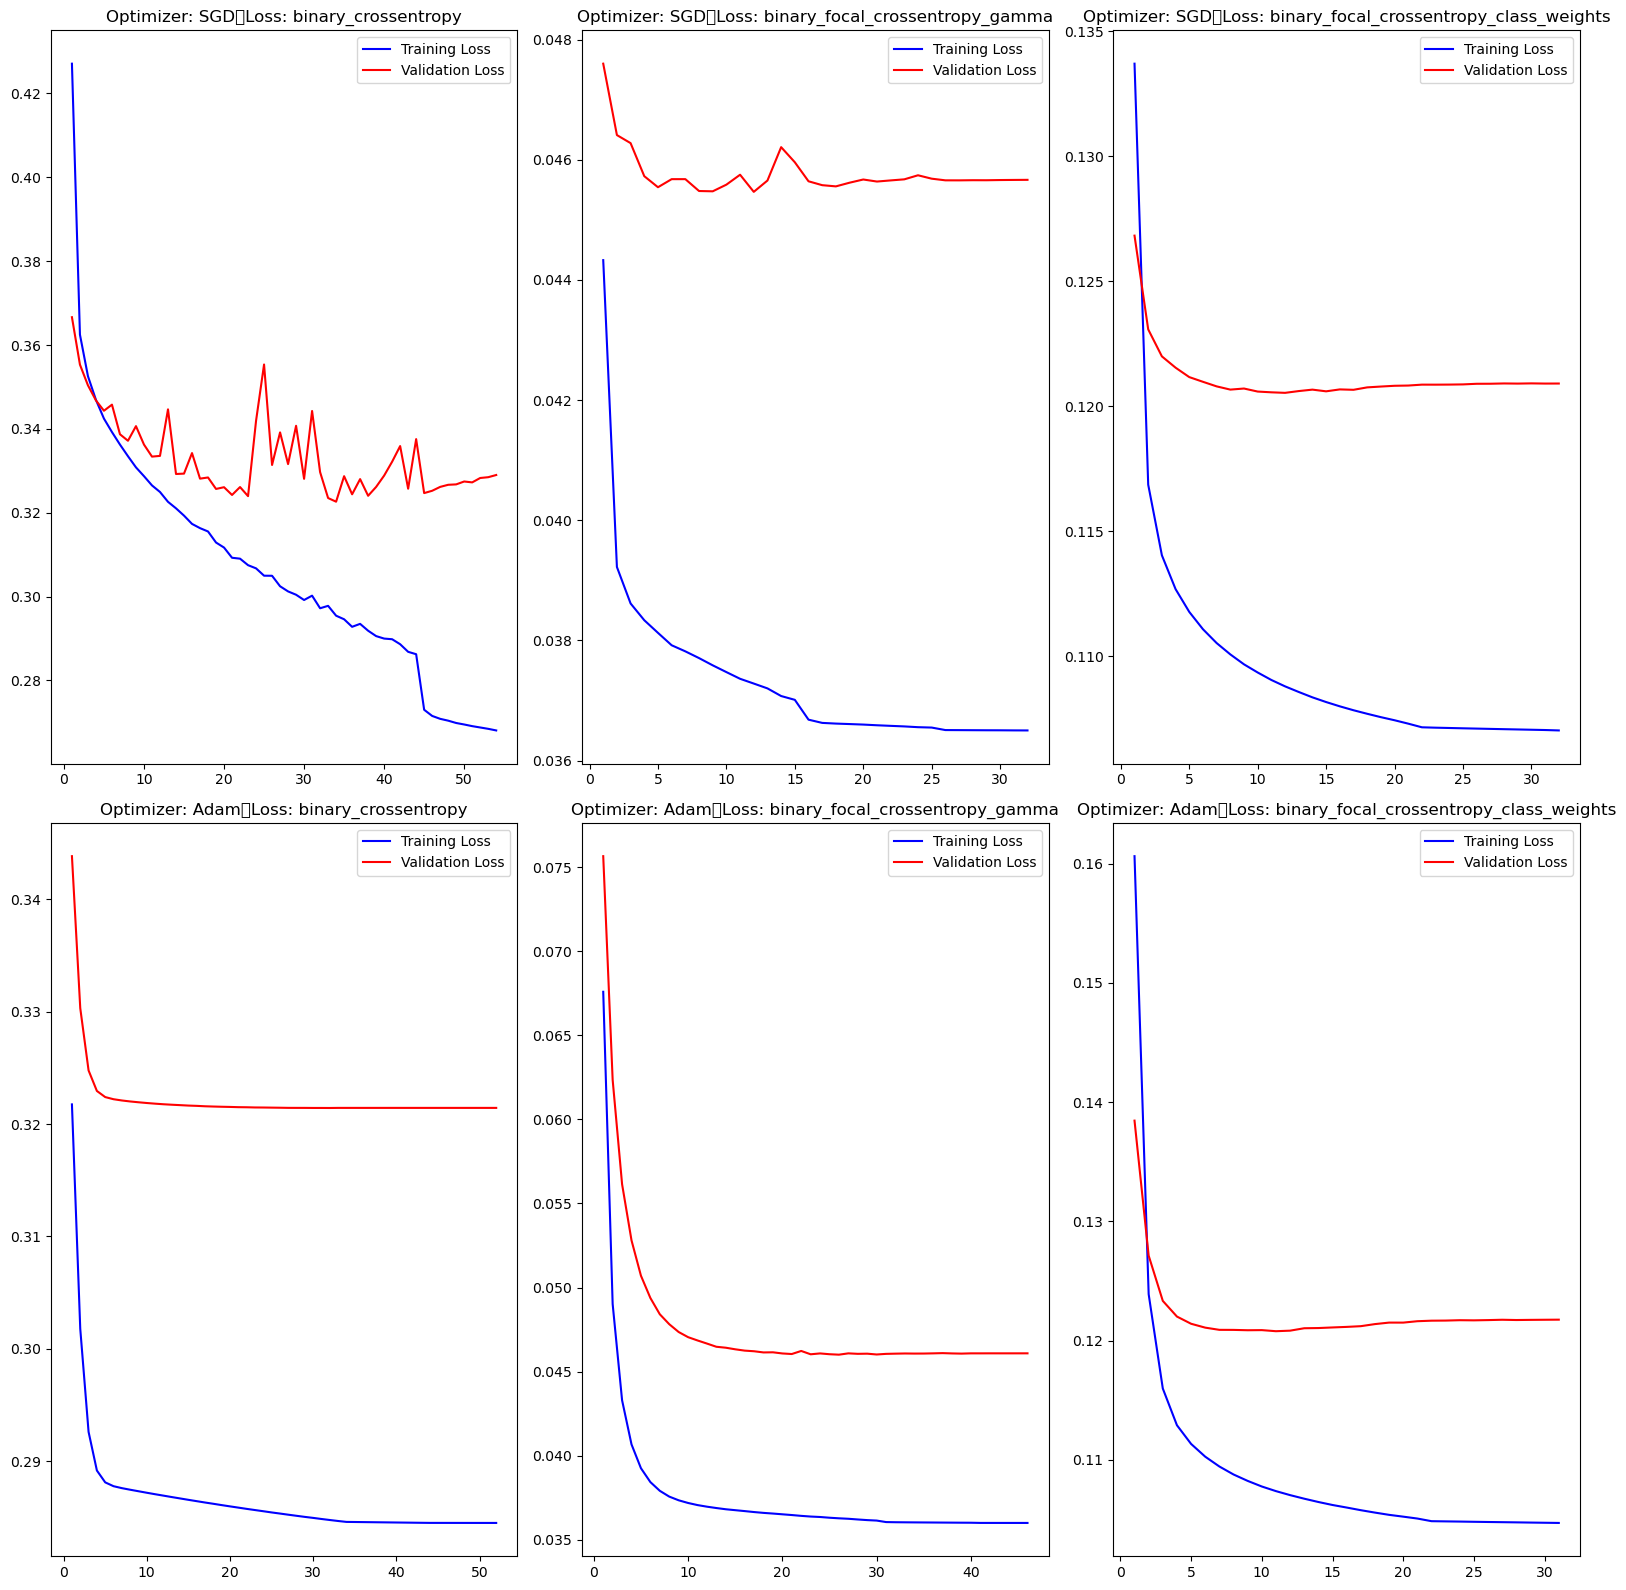

In [297]:
fig, ax = plt.subplots(2, 3, figsize=(16, 16))
ax = ax.flatten()

for i, pair in enumerate(optimizer_loss_combinations):
        optimizer = pair["optimizer"]
        loss = pair["loss"]
        
        print(f'Compiling ANN with Optimizer = {optimizer.name}\nLoss function = {loss.name}')
        
        callbacks = get_callbacks(f'models/model_{optimizer.name}_{loss.name}')
        hist, ann, res = run_model(ann, optimizer=optimizer, loss=loss, metrics=metrics, num_epochs=num_epochs, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val, callbacks=callbacks)
        results[f'{optimizer.name}+{loss.name}'] = res

        # plotting loss-curves
        training_losses = hist.history["loss"]
        test_losses = hist.history["val_loss"]
        epochs = np.arange(1, len(training_losses) + 1)

        ax[i].plot(epochs, training_losses, c="b", label="Training Loss")
        ax[i].plot(epochs, test_losses, c="r", label="Validation Loss")
        ax[i].set_title(f"Optimizer: {optimizer.name}\tLoss: {loss.name}")
        ax[i].legend()

fig.tight_layout()

In [298]:
print_results(results)

loss       tp      fp        tn  \
SGD+binary_crossentropy                      0.323 1771.000 606.000 10233.000   
SGD+binary_focal_crossentropy_gamma          0.045 1814.000 671.000 10168.000   
SGD+binary_focal_crossentropy_class_weights  0.121 1121.000 159.000 10680.000   
Adam+binary_crossentropy                     0.321 1779.000 583.000 10256.000   
Adam+binary_focal_crossentropy_gamma         0.046 1824.000 710.000 10129.000   
Adam+binary_focal_crossentropy_class_weights 0.121 1153.000 170.000 10669.000   

                                                   fn   acc  precision  \
SGD+binary_crossentropy                      1314.000 0.862      0.745   
SGD+binary_focal_crossentropy_gamma          1271.000 0.861      0.730   
SGD+binary_focal_crossentropy_class_weights  1964.000 0.848      0.876   
Adam+binary_crossentropy                     1306.000 0.864      0.753   
Adam+binary_focal_crossentropy_gamma         1261.000 0.858      0.720   
Adam+binary_focal_crossentropy_class_weights 1932.000 0.849      0.872   

                                              recall  auc_pr  
SGD+binary_crossentropy                        0.574   0.749  
SGD+binary_focal_crossentropy_gamma            0.588   0.737  
SGD+binary_focal_crossentropy_class_weights    0.363   0.751  
Adam+binary_crossentropy                       0.577   0.751  
Adam+binary_focal_crossentropy_gamma           0.591   0.737  
Adam+binary_focal_crossentropy_class_weights   0.374   0.751

Zahvaljujuci EarlyStopping mehanizmu nemamo porast loss funkcije na validacionom skupu podataka, medjutim prestanak nakon 50 epoha, kao i velika razlika u vrednosti loss funckije na trening skupu i validacionom skupu ukazuje na moguci overfitting. Ovaj problem cemo probati da resimo u nastavku koriscenjem razlicitih tehnika regularazacije (L2 i L1) kao i primenom Dropout tehnike.

#### L2 regularizacija

In [92]:
num_epochs = 150
results = dict()

In [93]:
optimizer_loss_combinations_l2 = (
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.01),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-6),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
)

In [94]:
input_shape = X_train.shape[1]
reg_param = 1e-3

ann = Sequential()
ann.add(Dense(input_shape, input_shape=(input_shape,), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(100, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(1, activation="sigmoid"))

Compiling ANN with Optimizer = SGD
Loss function = binary_crossentropy
Epoch 1/150
218/218 [==============================] - 3s 10ms/step - loss: 0.9849 - tp: 8018.0000 - fp: 2963.0000 - tn: 94581.0000 - fn: 19749.0000 - accuracy: 0.8188 - precision: 0.7302 - recall: 0.2888 - prc: 0.5853 - val_loss: 0.9069 - val_tp: 1540.0000 - val_fp: 656.0000 - val_tn: 10183.0000 - val_fn: 1545.0000 - val_accuracy: 0.8419 - val_precision: 0.7013 - val_recall: 0.4992 - val_prc: 0.6754 - lr: 0.1000
Epoch 2/150
218/218 [==============================] - 2s 8ms/step - loss: 0.8804 - tp: 12388.0000 - fp: 5096.0000 - tn: 81609.0000 - fn: 12294.0000 - accuracy: 0.8439 - precision: 0.7085 - recall: 0.5019 - prc: 0.6824 - val_loss: 0.8526 - val_tp: 1585.0000 - val_fp: 632.0000 - val_tn: 10207.0000 - val_fn: 1500.0000 - val_accuracy: 0.8469 - val_precision: 0.7149 - val_recall: 0.5138 - val_prc: 0.6938 - lr: 0.1000
Epoch 3/150
218/218 [==============================] - 2s 8ms/step - loss: 0.8298 - tp: 12596.0

/tmp/ipykernel_633926/3153820308.py:24: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


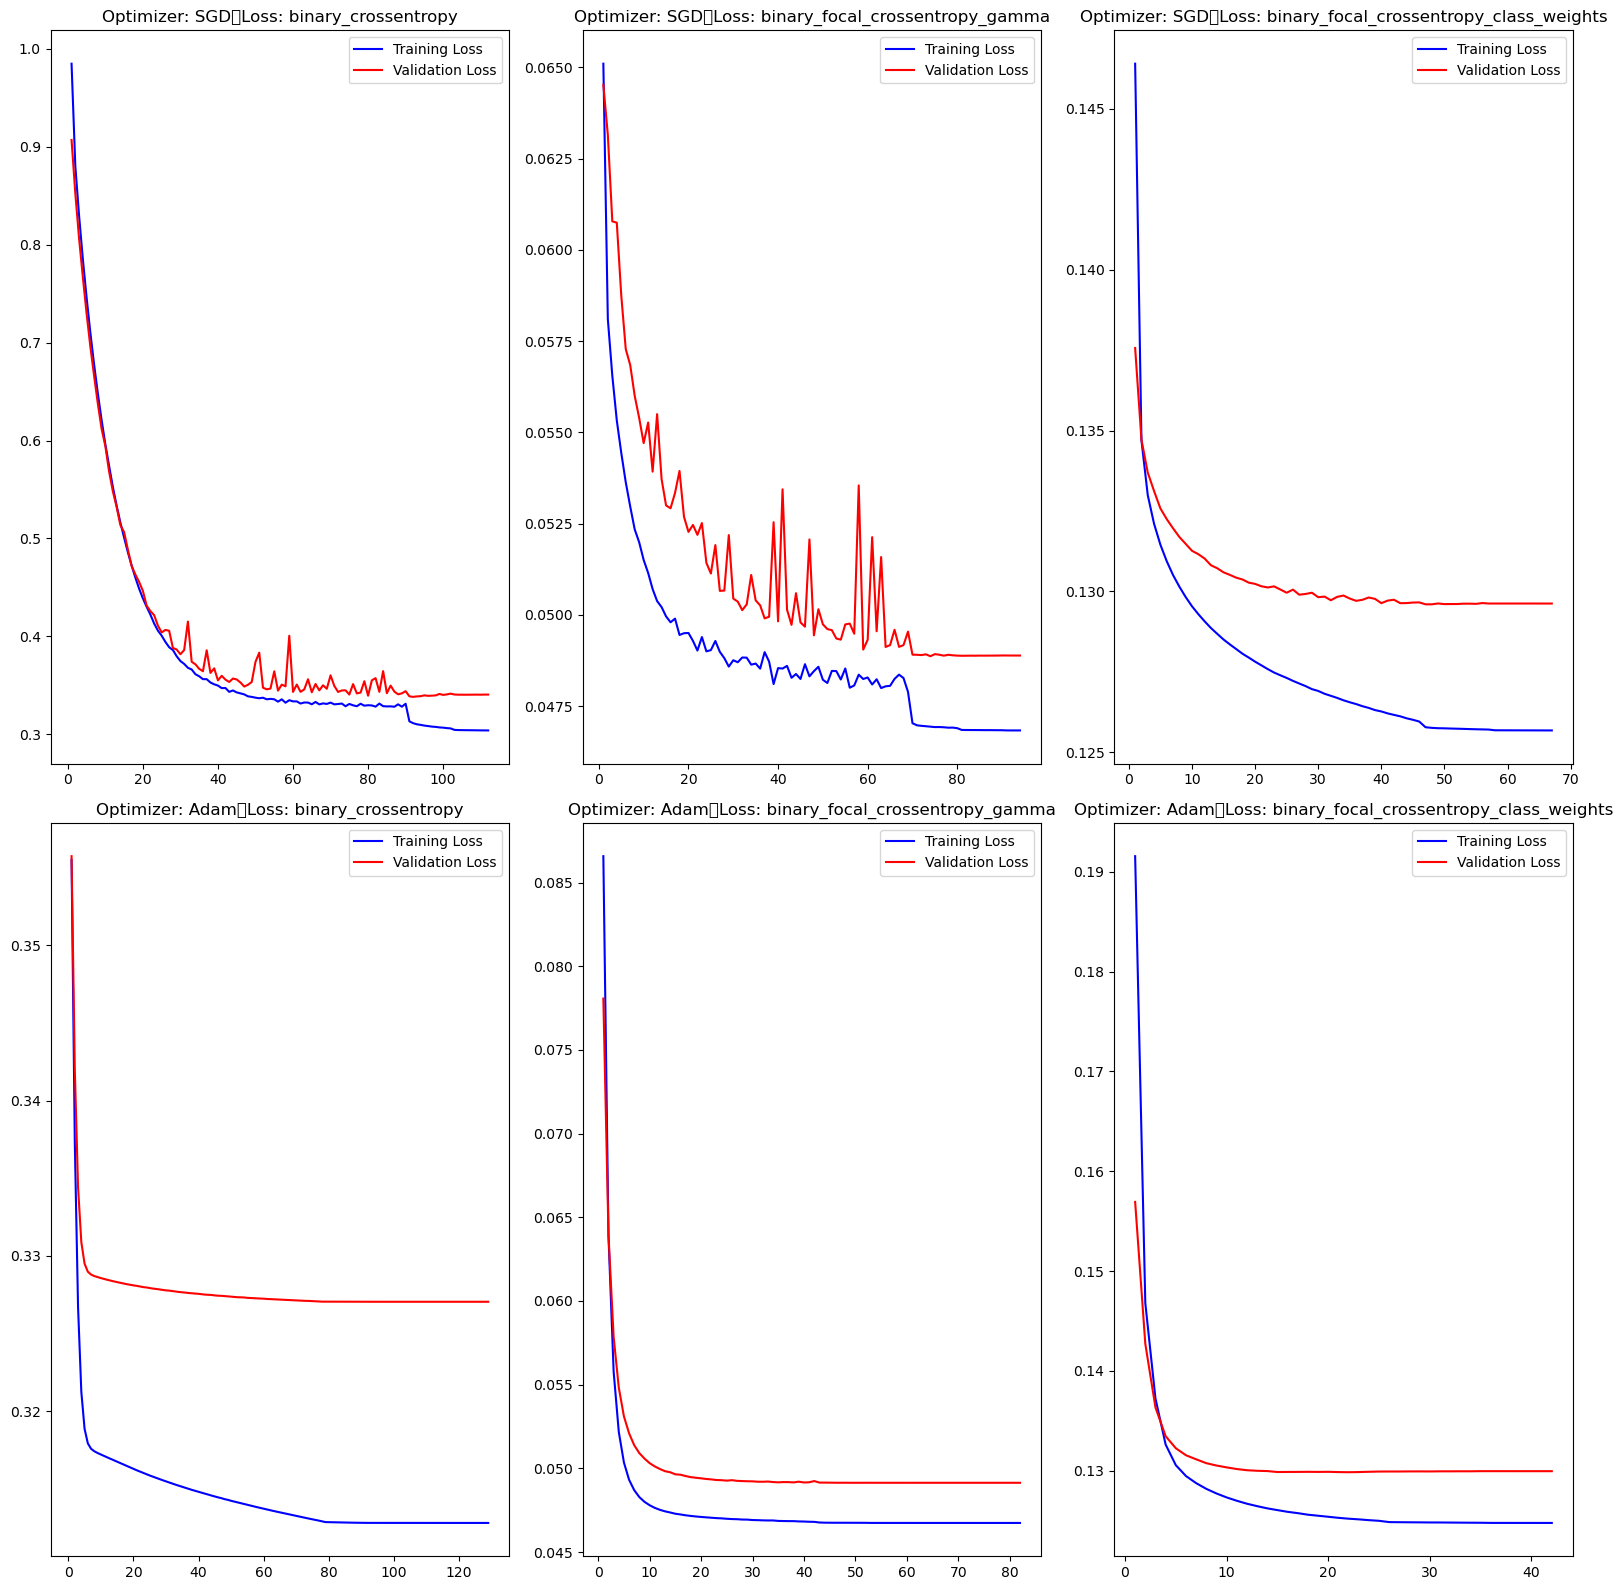

In [95]:
fig, ax = plt.subplots(2, 3, figsize=(16, 16))
ax = ax.flatten()

for i, pair in enumerate(optimizer_loss_combinations_l2):
        optimizer = pair["optimizer"]
        loss = pair["loss"]
        
        print(f'Compiling ANN with Optimizer = {optimizer.name}\nLoss function = {loss.name}')
        
        callbacks = get_callbacks(f'models/l2_model_{optimizer.name}_{loss.name}')
        hist, ann, res = run_model(ann, optimizer=optimizer, loss=loss, metrics=metrics, num_epochs=num_epochs, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val, callbacks=callbacks)
        results[f'{optimizer.name}+{loss.name}'] = res

        # plotting loss-curves
        training_losses = hist.history["loss"]
        test_losses = hist.history["val_loss"]
        epochs = np.arange(1, len(training_losses) + 1)

        ax[i].plot(epochs, training_losses, c="b", label="Training Loss")
        ax[i].plot(epochs, test_losses, c="r", label="Validation Loss")
        ax[i].set_title(f"Optimizer: {optimizer.name}\tLoss: {loss.name}")
        ax[i].legend()

fig.tight_layout()


In [96]:
print_results(results)

loss       tp      fp        tn  \
SGD+binary_crossentropy                      0.338 1791.000 580.000 10259.000   
SGD+binary_focal_crossentropy_gamma          0.049 1741.000 537.000 10302.000   
SGD+binary_focal_crossentropy_class_weights  0.130 1057.000 123.000 10716.000   
Adam+binary_crossentropy                     0.327 1784.000 566.000 10273.000   
Adam+binary_focal_crossentropy_gamma         0.049 1755.000 535.000 10304.000   
Adam+binary_focal_crossentropy_class_weights 0.130 1097.000 129.000 10710.000   

                                                   fn   acc  precision  \
SGD+binary_crossentropy                      1294.000 0.865      0.755   
SGD+binary_focal_crossentropy_gamma          1344.000 0.865      0.764   
SGD+binary_focal_crossentropy_class_weights  2028.000 0.846      0.896   
Adam+binary_crossentropy                     1301.000 0.866      0.759   
Adam+binary_focal_crossentropy_gamma         1330.000 0.866      0.766   
Adam+binary_focal_crossentropy_class_weights 1988.000 0.848      0.895   

                                              recall  auc_pr  
SGD+binary_crossentropy                        0.581   0.762  
SGD+binary_focal_crossentropy_gamma            0.564   0.758  
SGD+binary_focal_crossentropy_class_weights    0.343   0.757  
Adam+binary_crossentropy                       0.578   0.759  
Adam+binary_focal_crossentropy_gamma           0.569   0.761  
Adam+binary_focal_crossentropy_class_weights   0.356   0.759

#### L1 regularizacija

In [304]:
num_epochs = 150
results = dict()

In [305]:
optimizer_loss_combinations_l1 = (
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.01),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-6),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
)

In [306]:
input_shape = X_train.shape[1]
reg_param = 1e-4

ann = Sequential()
ann.add(Dense(input_shape, input_shape=(input_shape,), activation="relu", kernel_regularizer=tf.keras.regularizers.l1(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(reg_param)))
ann.add(Dense(100, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(reg_param)))
ann.add(Dense(1, activation="sigmoid"))

Compiling ANN with Optimizer = SGD
Loss function = binary_crossentropy
Epoch 1/150


218/218 [==============================] - 3s 10ms/step - loss: 1.0461 - tp: 8950.0000 - fp: 3502.0000 - tn: 94042.0000 - fn: 18817.0000 - accuracy: 0.8219 - precision: 0.7188 - recall: 0.3223 - prc: 0.5931 - val_loss: 0.9850 - val_tp: 1638.0000 - val_fp: 754.0000 - val_tn: 10085.0000 - val_fn: 1447.0000 - val_accuracy: 0.8419 - val_precision: 0.6848 - val_recall: 0.5310 - val_prc: 0.6790 - lr: 0.1000
Epoch 2/150
218/218 [==============================] - 2s 8ms/step - loss: 0.9712 - tp: 12486.0000 - fp: 5094.0000 - tn: 81611.0000 - fn: 12196.0000 - accuracy: 0.8448 - precision: 0.7102 - recall: 0.5059 - prc: 0.6846 - val_loss: 0.9567 - val_tp: 1646.0000 - val_fp: 710.0000 - val_tn: 10129.0000 - val_fn: 1439.0000 - val_accuracy: 0.8457 - val_precision: 0.6986 - val_recall: 0.5335 - val_prc: 0.6960 - lr: 0.1000
Epoch 3/150
218/218 [==============================] - 2s 8ms/step - loss: 0.9440 - tp: 12667.0000 - fp: 4907.0000 - tn: 81798.0000 - fn: 12015.0000 - accuracy: 0.8481 - precisio

/tmp/ipykernel_4766/511562039.py:24: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


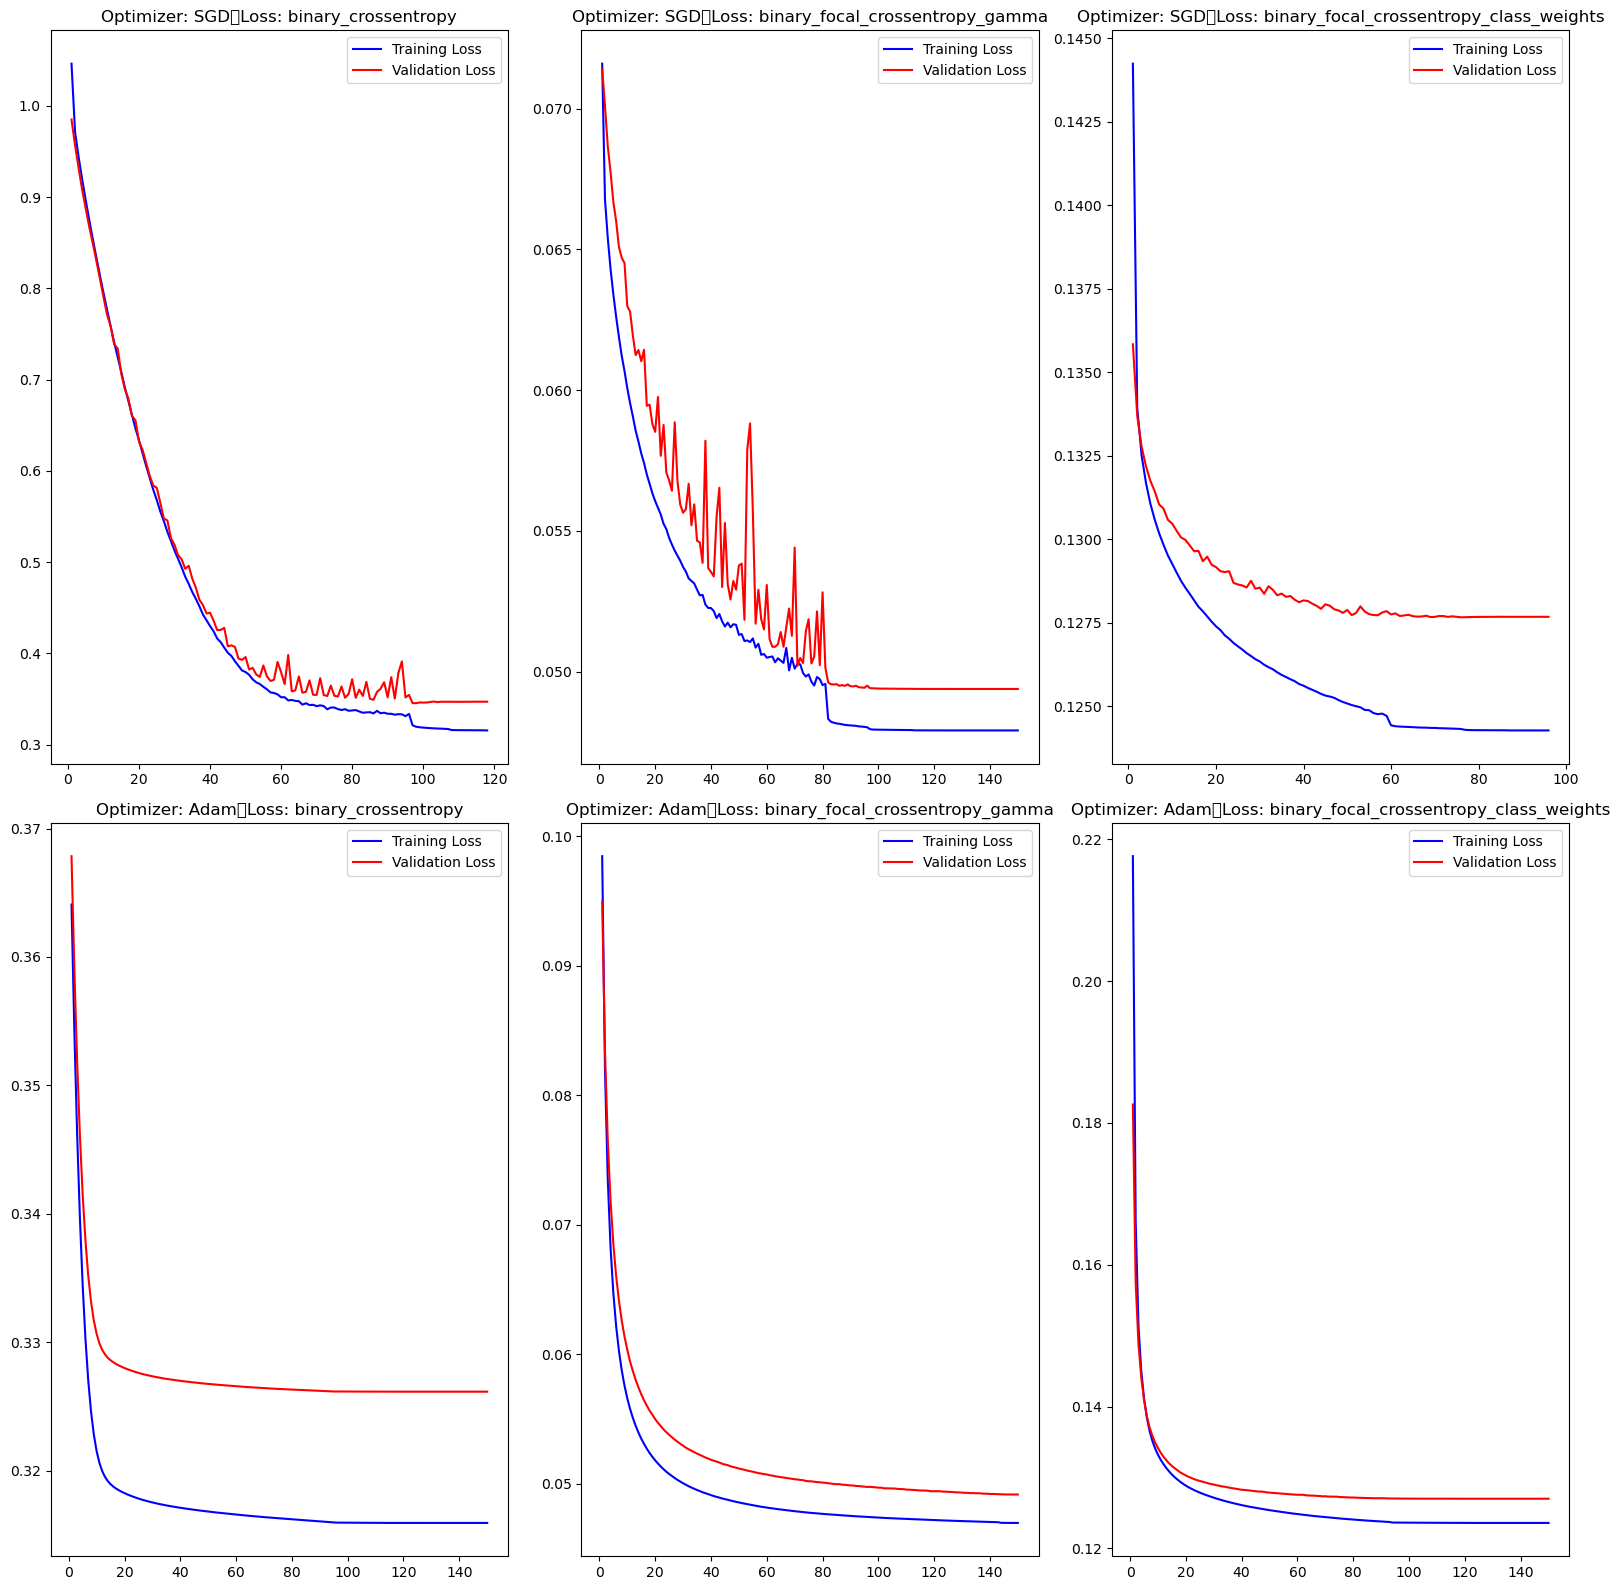

In [307]:
fig, ax = plt.subplots(2, 3, figsize=(16, 16))
ax = ax.flatten()

for i, pair in enumerate(optimizer_loss_combinations_l1):
        optimizer = pair["optimizer"]
        loss = pair["loss"]
        
        print(f'Compiling ANN with Optimizer = {optimizer.name}\nLoss function = {loss.name}')
        
        callbacks = get_callbacks(f'models/l1_model_{optimizer.name}_{loss.name}')
        hist, ann, res = run_model(ann, optimizer=optimizer, loss=loss, metrics=metrics, num_epochs=num_epochs, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val, callbacks=callbacks)
        results[f'{optimizer.name}+{loss.name}'] = res

        # plotting loss-curves
        training_losses = hist.history["loss"]
        test_losses = hist.history["val_loss"]
        epochs = np.arange(1, len(training_losses) + 1)

        ax[i].plot(epochs, training_losses, c="b", label="Training Loss")
        ax[i].plot(epochs, test_losses, c="r", label="Validation Loss")
        ax[i].set_title(f"Optimizer: {optimizer.name}\tLoss: {loss.name}")
        ax[i].legend()

fig.tight_layout()


In [308]:
print_results(results)

loss       tp      fp        tn  \
SGD+binary_crossentropy                      0.345 1800.000 595.000 10244.000   
SGD+binary_focal_crossentropy_gamma          0.049 1731.000 567.000 10272.000   
SGD+binary_focal_crossentropy_class_weights  0.128 1087.000 138.000 10701.000   
Adam+binary_crossentropy                     0.326 1741.000 552.000 10287.000   
Adam+binary_focal_crossentropy_gamma         0.049 1766.000 592.000 10247.000   
Adam+binary_focal_crossentropy_class_weights 0.127 1093.000 142.000 10697.000   

                                                   fn   acc  precision  \
SGD+binary_crossentropy                      1285.000 0.865      0.752   
SGD+binary_focal_crossentropy_gamma          1354.000 0.862      0.753   
SGD+binary_focal_crossentropy_class_weights  1998.000 0.847      0.887   
Adam+binary_crossentropy                     1344.000 0.864      0.759   
Adam+binary_focal_crossentropy_gamma         1319.000 0.863      0.749   
Adam+binary_focal_crossentropy_class_weights 1992.000 0.847      0.885   

                                              recall  auc_pr  
SGD+binary_crossentropy                        0.583   0.760  
SGD+binary_focal_crossentropy_gamma            0.561   0.754  
SGD+binary_focal_crossentropy_class_weights    0.352   0.757  
Adam+binary_crossentropy                       0.564   0.757  
Adam+binary_focal_crossentropy_gamma           0.572   0.754  
Adam+binary_focal_crossentropy_class_weights   0.354   0.758

#### Dropout

In [309]:
num_epochs = 150
results = dict()

In [310]:
optimizer_loss_combinations_dropout = (
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.01),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=1e-4),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-4),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-4),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
)

In [311]:
input_shape = X_train.shape[1]

ann = Sequential()
ann.add(Dropout(0.2, input_shape=(input_shape, )))
ann.add(Dense(input_shape, activation="relu"))
ann.add(Dropout(0.6))
ann.add(Dense(200, activation="relu"))
ann.add(Dropout(0.6))
ann.add(Dense(200, activation="relu"))
ann.add(Dropout(0.6))
ann.add(Dense(100, activation="relu"))
ann.add(Dropout(0.6))
ann.add(Dense(1, activation="sigmoid"))

Compiling ANN with Optimizer = SGD
Loss function = binary_crossentropy
Epoch 1/150


218/218 [==============================] - 3s 8ms/step - loss: 0.5224 - tp: 1369.0000 - fp: 1067.0000 - tn: 96477.0000 - fn: 26398.0000 - accuracy: 0.7808 - precision: 0.5620 - recall: 0.0493 - prc: 0.3420 - val_loss: 0.4958 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 10839.0000 - val_fn: 3085.0000 - val_accuracy: 0.7784 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_prc: 0.6132 - lr: 0.1000
Epoch 2/150
218/218 [==============================] - 3s 16ms/step - loss: 0.4670 - tp: 8.0000 - fp: 6.0000 - tn: 86699.0000 - fn: 24674.0000 - accuracy: 0.7784 - precision: 0.5714 - recall: 3.2412e-04 - prc: 0.4460 - val_loss: 0.4655 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 10839.0000 - val_fn: 3085.0000 - val_accuracy: 0.7784 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_prc: 0.6216 - lr: 0.1000
Epoch 3/150
218/218 [==============================] - 2s 7ms/step - loss: 0.4493 - tp: 526.0000 - fp: 152.0000 - tn: 86553.0000 - fn: 24156.0000 - accuracy: 0

/tmp/ipykernel_4766/1933362923.py:24: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


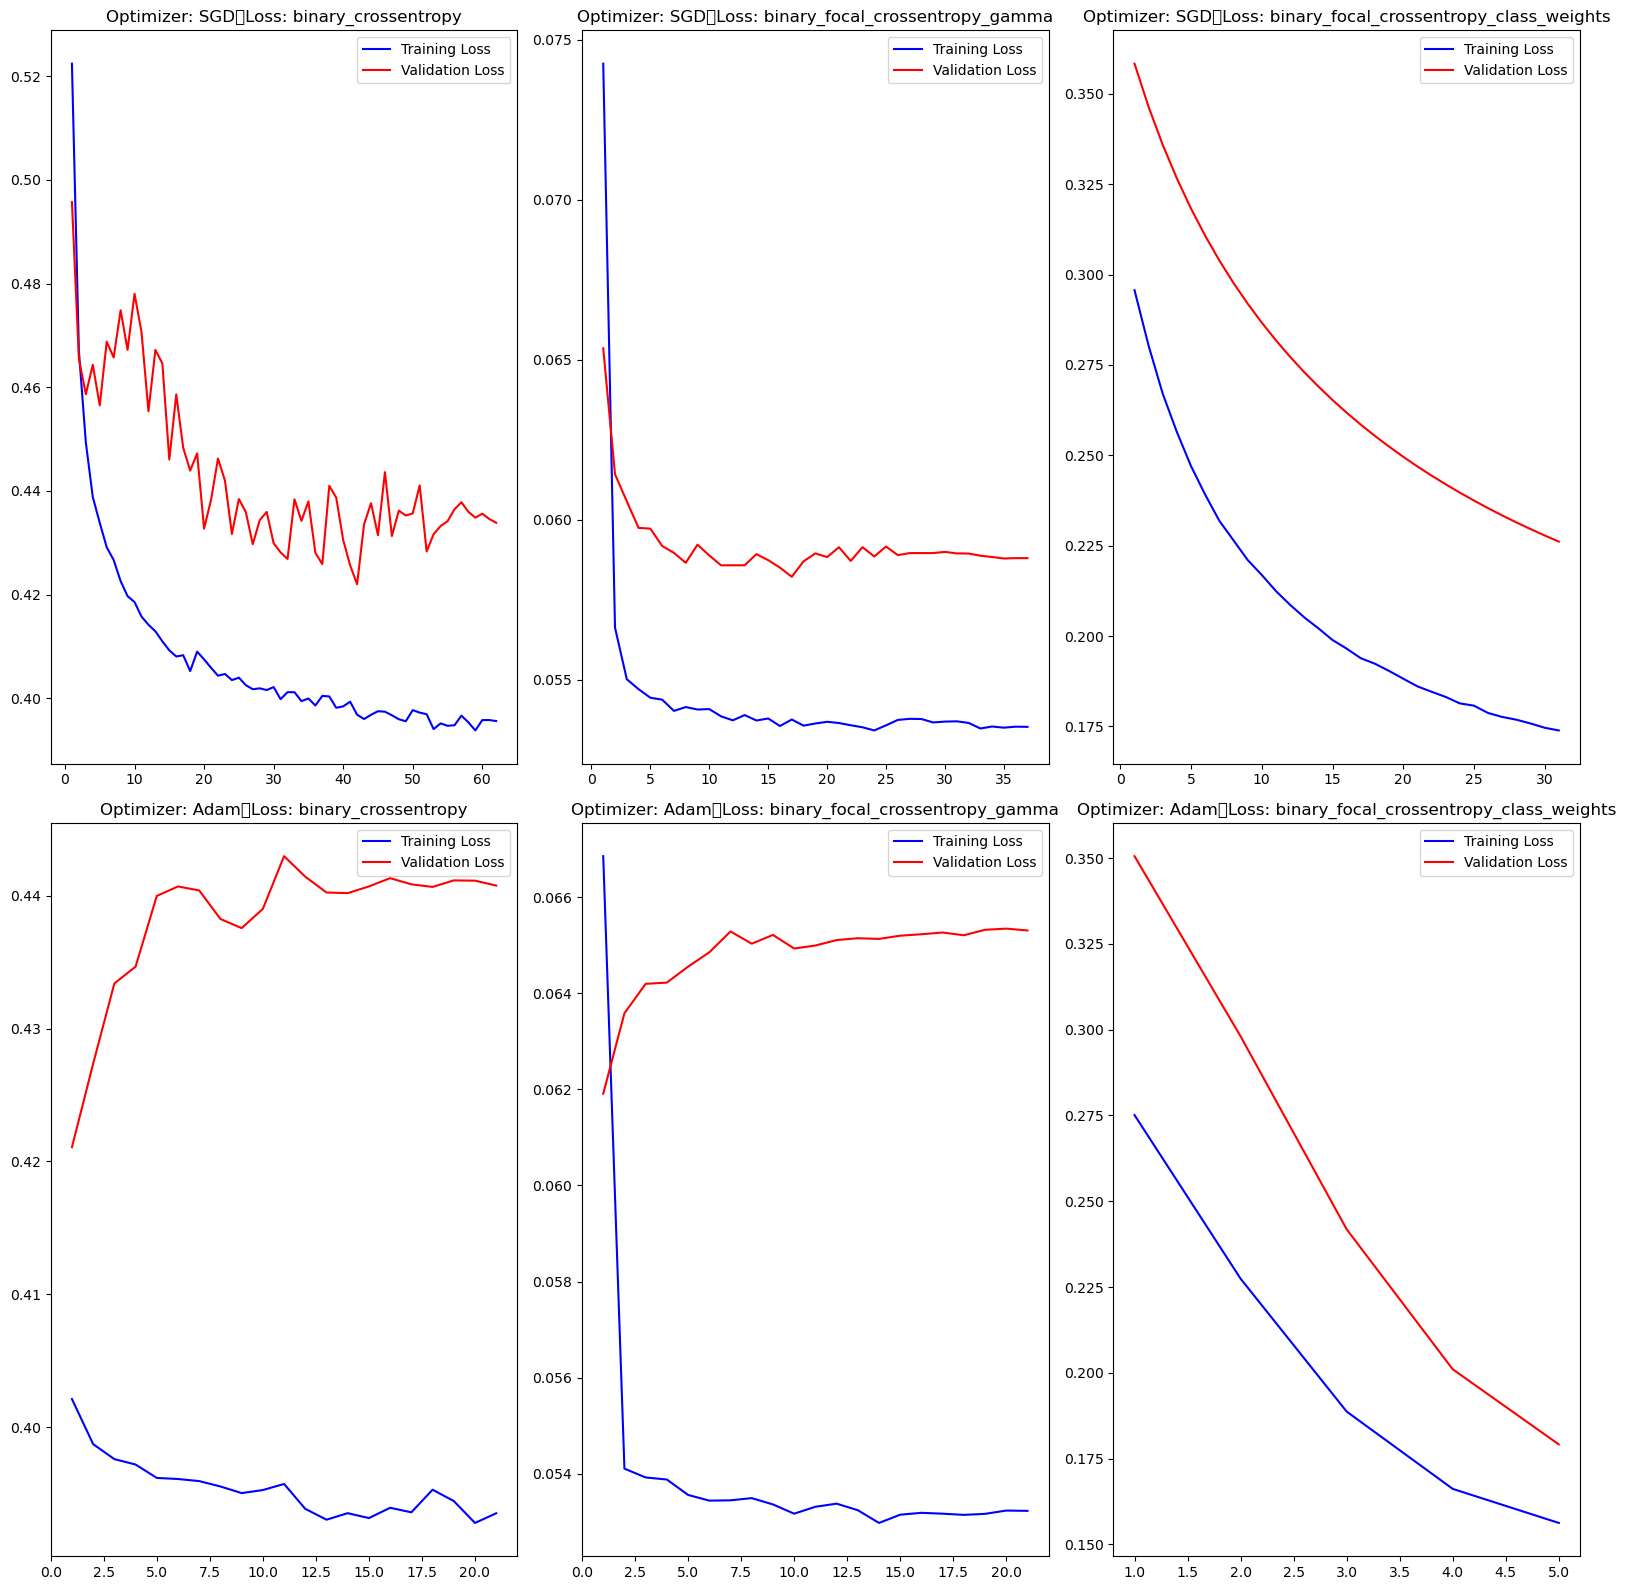

In [312]:
fig, ax = plt.subplots(2, 3, figsize=(16, 16))
ax = ax.flatten()

for i, pair in enumerate(optimizer_loss_combinations_dropout):
        optimizer = pair["optimizer"]
        loss = pair["loss"]
        
        print(f'Compiling ANN with Optimizer = {optimizer.name}\nLoss function = {loss.name}')
        
        callbacks = get_callbacks(f'models/dropout_model_{optimizer.name}_{loss.name}')
        hist, ann, res = run_model(ann, optimizer=optimizer, loss=loss, metrics=metrics, num_epochs=num_epochs, X_train=X_train.todense(), Y_train=Y_train, X_val=X_val, Y_val=Y_val, callbacks=callbacks)
        results[f'{optimizer.name}+{loss.name}'] = res

        # plotting loss-curves
        training_losses = hist.history["loss"]
        test_losses = hist.history["val_loss"]
        epochs = np.arange(1, len(training_losses) + 1)

        ax[i].plot(epochs, training_losses, c="b", label="Training Loss")
        ax[i].plot(epochs, test_losses, c="r", label="Validation Loss")
        ax[i].set_title(f"Optimizer: {optimizer.name}\tLoss: {loss.name}")
        ax[i].legend()

fig.tight_layout()


In [313]:
print_results(results)

loss       tp       fp  \
SGD+binary_crossentropy                      0.422 1741.000  807.000   
SGD+binary_focal_crossentropy_gamma          0.058 1498.000  501.000   
SGD+binary_focal_crossentropy_class_weights  0.226 1044.000  199.000   
Adam+binary_crossentropy                     0.421 1713.000  770.000   
Adam+binary_focal_crossentropy_gamma         0.062 1959.000 1128.000   
Adam+binary_focal_crossentropy_class_weights 0.179  500.000   41.000   

                                                    tn       fn   acc  \
SGD+binary_crossentropy                      10032.000 1344.000 0.846   
SGD+binary_focal_crossentropy_gamma          10338.000 1587.000 0.850   
SGD+binary_focal_crossentropy_class_weights  10640.000 2041.000 0.839   
Adam+binary_crossentropy                     10069.000 1372.000 0.846   
Adam+binary_focal_crossentropy_gamma          9711.000 1126.000 0.838   
Adam+binary_focal_crossentropy_class_weights 10798.000 2585.000 0.811   

                                              precision  recall  auc_pr  
SGD+binary_crossentropy                           0.683   0.564   0.699  
SGD+binary_focal_crossentropy_gamma               0.749   0.486   0.698  
SGD+binary_focal_crossentropy_class_weights       0.840   0.338   0.698  
Adam+binary_crossentropy                          0.690   0.555   0.700  
Adam+binary_focal_crossentropy_gamma              0.635   0.635   0.695  
Adam+binary_focal_crossentropy_class_weights      0.924   0.162   0.702

Zbog nebalansiranosti klasa, probacemo da iskoristimo SMOTE u kombinaciji sa L2 regularizovanom neuronskom mrezom, koja je dala bolje rezultate (iako su rezultati slicni kao kod L1 regularizacije, trening je trajao dosta epoha krace).

#### Custom Loss -  L2 Regularizacija

In [101]:
num_epochs = 150

In [107]:
input_shape = X_train.shape[1]
reg_param = 1e-3

ann = Sequential()
ann.add(Dense(input_shape, input_shape=(input_shape,), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(100, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(1, activation="sigmoid"))

Epoch 1/150
218/218 [==============================] - 6s 20ms/step - loss: 0.9069 - tp: 11436.0000 - fp: 7402.0000 - tn: 90142.0000 - fn: 16331.0000 - accuracy: 0.8106 - precision: 0.6071 - recall: 0.4119 - prc: 0.5827 - val_loss: 0.8374 - val_tp: 1857.0000 - val_fp: 1158.0000 - val_tn: 9681.0000 - val_fn: 1228.0000 - val_accuracy: 0.8286 - val_precision: 0.6159 - val_recall: 0.6019 - val_prc: 0.6659 - lr: 0.1000
Epoch 2/150
218/218 [==============================] - 4s 16ms/step - loss: 0.8089 - tp: 15256.0000 - fp: 9105.0000 - tn: 77600.0000 - fn: 9426.0000 - accuracy: 0.8336 - precision: 0.6262 - recall: 0.6181 - prc: 0.6781 - val_loss: 0.7833 - val_tp: 1915.0000 - val_fp: 1115.0000 - val_tn: 9724.0000 - val_fn: 1170.0000 - val_accuracy: 0.8359 - val_precision: 0.6320 - val_recall: 0.6207 - val_prc: 0.6904 - lr: 0.1000
Epoch 3/150
218/218 [==============================] - 4s 16ms/step - loss: 0.7594 - tp: 15427.0000 - fp: 8702.0000 - tn: 78003.0000 - fn: 9255.0000 - accuracy: 0.83

/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


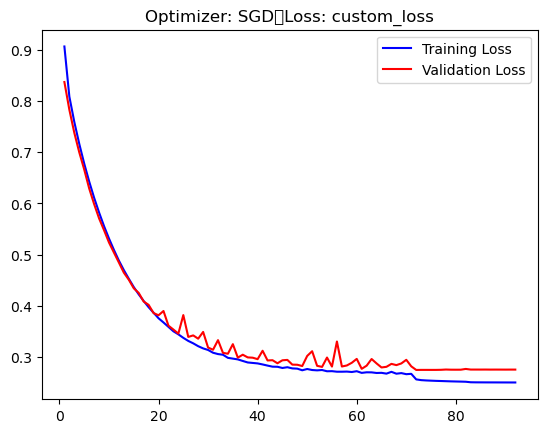

In [108]:
callbacks = get_callbacks(f'models/l2_model_SGD_custom_loss')
hist, ann, res = run_model(ann, optimizer=tf.optimizers.SGD(learning_rate=0.1), loss=custom_loss, metrics=metrics, num_epochs=num_epochs, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val, callbacks=callbacks)

# plotting loss-curves
training_losses = hist.history["loss"]
test_losses = hist.history["val_loss"]
epochs = np.arange(1, len(training_losses) + 1)

plt.plot(epochs, training_losses, c="b", label="Training Loss")
plt.plot(epochs, test_losses, c="r", label="Validation Loss")
plt.title(f"Optimizer: SGD\tLoss: custom_loss")
plt.legend()

In [109]:
print_results({"SGD_custom_loss": res})

loss       tp      fp       tn       fn   acc  precision  \
SGD_custom_loss 0.274 2060.000 975.000 9864.000 1025.000 0.856      0.679   

                 recall  auc_pr  
SGD_custom_loss   0.668   0.761

### SMOTE Oversampling

In [355]:
dataset = df_imputed_loc.copy(deep=True)

dataset.head()

Location  MinTemp  MaxTemp WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0   Albury   13.400   22.900           W         14.139          W        WNW   
1   Albury    7.400   25.100         WNW         14.139        NNW        WSW   
2   Albury   12.900   25.700         WSW         14.586          W        WSW   
3   Albury    9.200   28.000          NE          9.250         SE          E   
4   Albury   17.500   32.300           W         13.457        ENE         NW   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  \
0         8.142         9.250     5041.000       22.000     1007.100   
1         2.639         8.704     1936.000       25.000     1007.800   
2         7.855         9.783     1444.000       30.000     1008.700   
3         5.358         4.656     2025.000       16.000     1012.800   
4         3.905         8.142     6724.000       33.000     1006.000   

  RainToday RainTomorrow  Month_sin  Month_cos  Day_sin  Day_cos  
0        No           No     -0.000      1.000    0.201    0.980  
1        No           No     -0.000      1.000    0.394    0.919  
2        No           No     -0.000      1.000    0.571    0.821  
3        No           No     -0.000      1.000    0.725    0.689  
4        No           No     -0.000      1.000    0.849    0.529

In [356]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=0.7, random_state=42, n_jobs=-1)

In [357]:
X_train, Y_train, X_test, Y_test, X_val, Y_val = train_test_val_split(dataset, test_size=0.2, transformer=tr)

In [358]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
unique, counts = np.unique(Y_train, return_counts=True)
print(unique, counts)

(111387, 110)
(13923, 110)
(13924, 110)
[0 1] [86705 24682]


In [359]:
X_train, Y_train = smote.fit_resample(X_train, Y_train)

/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [360]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
unique, counts = np.unique(Y_train, return_counts=True)
print(unique, counts)

(147398, 110)
(13923, 110)
(13924, 110)
[0 1] [86705 60693]


In [361]:
X_train = X_train.todense()

In [379]:
num_epochs = 150
results = dict()

In [380]:
optimizer_loss_combinations_smote = (
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.01),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.01),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-6),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-6),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
)

In [381]:
input_shape = X_train.shape[1]
reg_param = 1e-3

ann = Sequential()
ann.add(Dense(input_shape, input_shape=(input_shape,), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(100, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(1, activation="sigmoid"))

Compiling ANN with Optimizer = SGD
Loss function = binary_crossentropy
Epoch 1/150


288/288 [==============================] - 3s 6ms/step - loss: 1.2458 - tp: 8155.0000 - fp: 7555.0000 - tn: 89989.0000 - fn: 55623.0000 - accuracy: 0.6084 - precision: 0.5191 - recall: 0.1279 - prc: 0.5322 - val_loss: 1.1515 - val_tp: 506.0000 - val_fp: 116.0000 - val_tn: 10723.0000 - val_fn: 2579.0000 - val_accuracy: 0.8064 - val_precision: 0.8135 - val_recall: 0.1640 - val_prc: 0.5914 - lr: 0.0100
Epoch 2/150
288/288 [==============================] - 1s 5ms/step - loss: 1.1497 - tp: 26543.0000 - fp: 5811.0000 - tn: 80894.0000 - fn: 34150.0000 - accuracy: 0.7289 - precision: 0.8204 - recall: 0.4373 - prc: 0.7658 - val_loss: 1.0428 - val_tp: 1875.0000 - val_fp: 1400.0000 - val_tn: 9439.0000 - val_fn: 1210.0000 - val_accuracy: 0.8126 - val_precision: 0.5725 - val_recall: 0.6078 - val_prc: 0.6362 - lr: 0.0100
Epoch 3/150
288/288 [==============================] - 1s 5ms/step - loss: 1.0576 - tp: 40219.0000 - fp: 12739.0000 - tn: 73966.0000 - fn: 20474.0000 - accuracy: 0.7747 - precision

/tmp/ipykernel_4766/2435278778.py:24: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


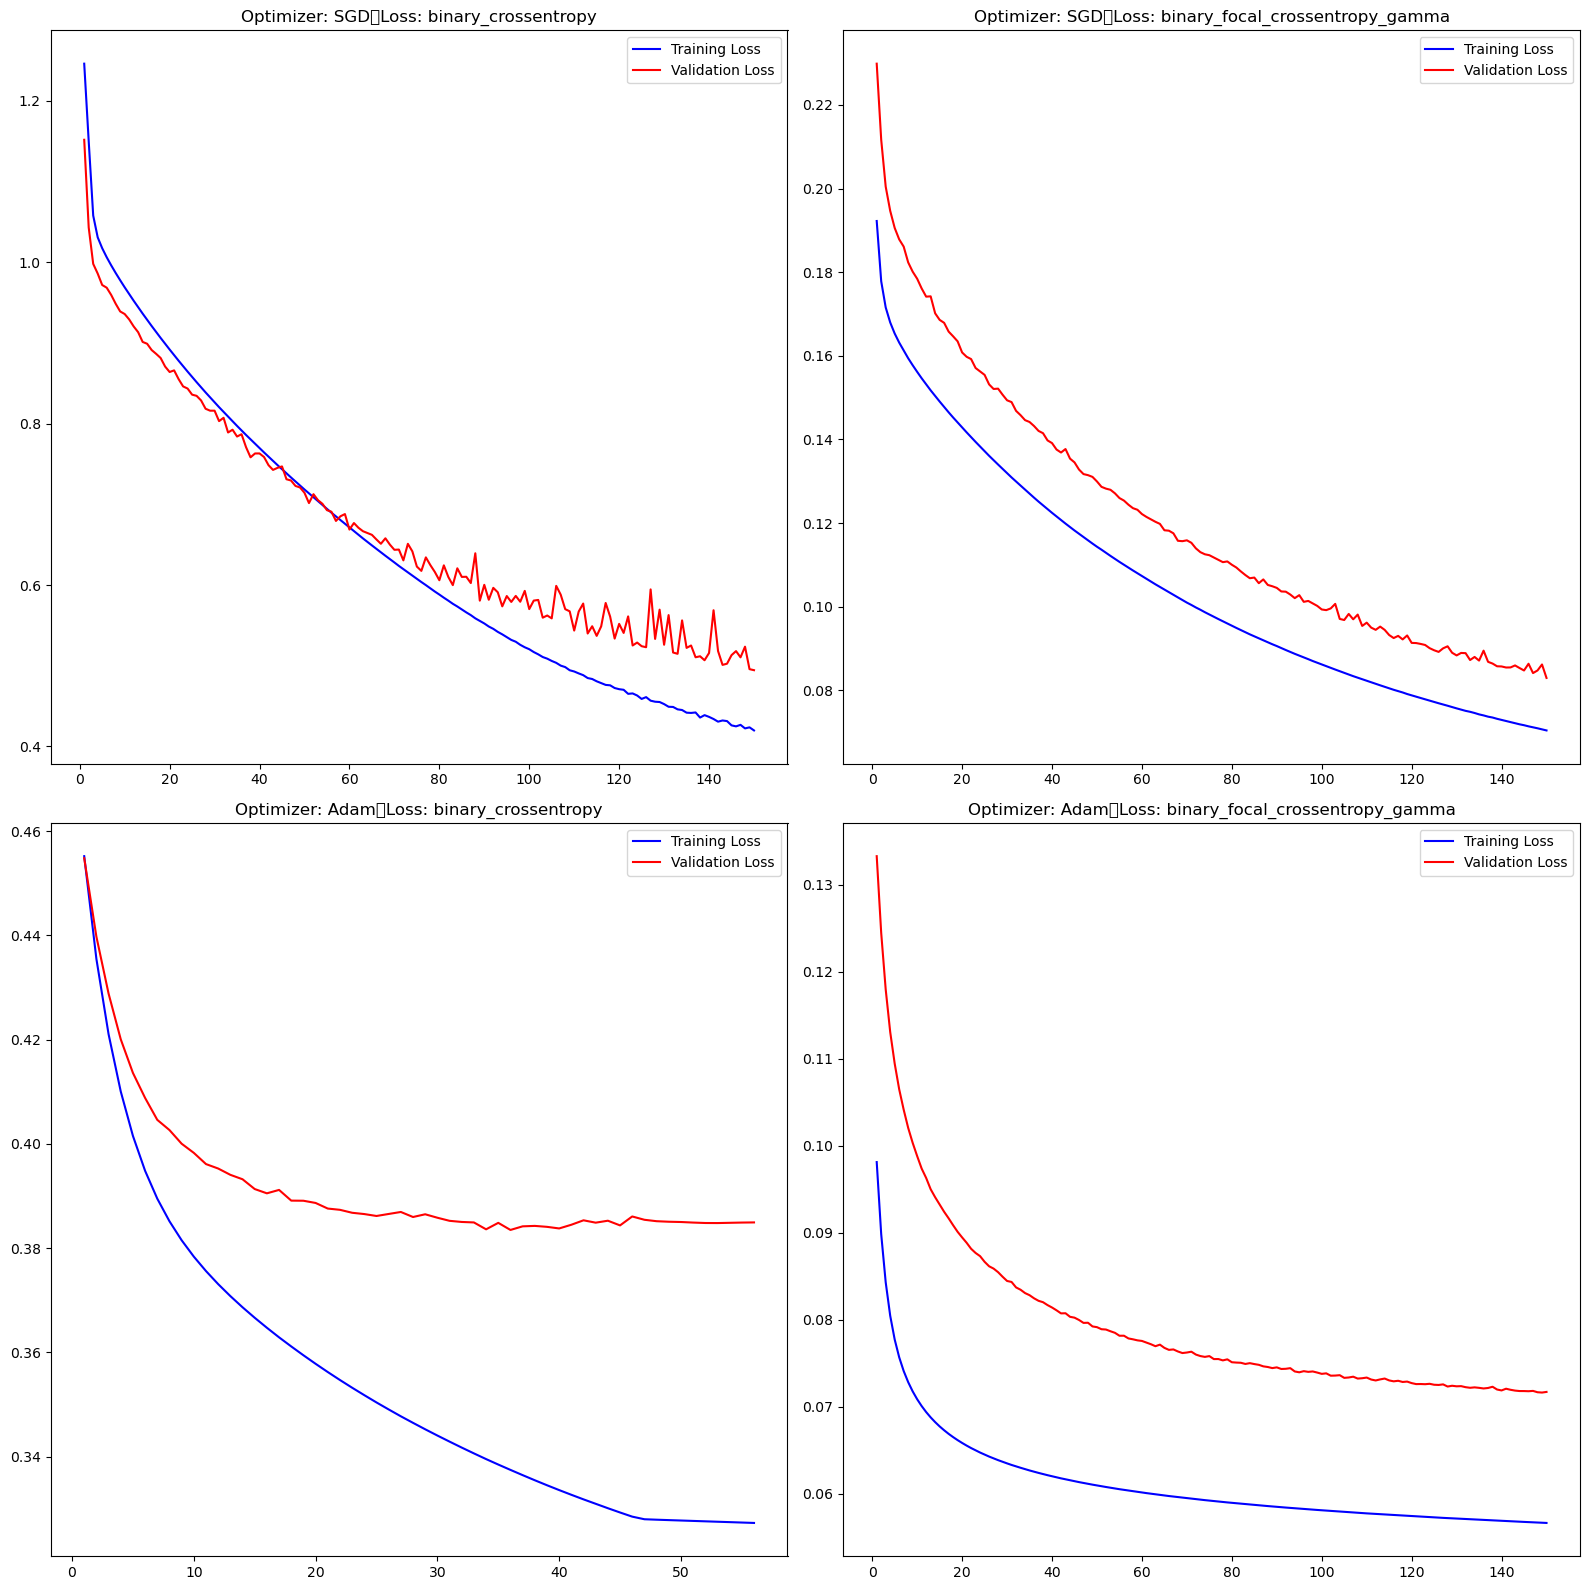

In [382]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax = ax.flatten()

for i, pair in enumerate(optimizer_loss_combinations_smote):
        optimizer = pair["optimizer"]
        loss = pair["loss"]
        
        print(f'Compiling ANN with Optimizer = {optimizer.name}\nLoss function = {loss.name}')
        
        callbacks = get_callbacks(f'models/smote_model_{optimizer.name}_{loss.name}')
        hist, ann, res = run_model(ann, optimizer=optimizer, loss=loss, metrics=metrics, num_epochs=num_epochs, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val, callbacks=callbacks)
        results[f'{optimizer.name}+{loss.name}'] = res

        # plotting loss-curves
        training_losses = hist.history["loss"]
        test_losses = hist.history["val_loss"]
        epochs = np.arange(1, len(training_losses) + 1)

        ax[i].plot(epochs, training_losses, c="b", label="Training Loss")
        ax[i].plot(epochs, test_losses, c="r", label="Validation Loss")
        ax[i].set_title(f"Optimizer: {optimizer.name}\tLoss: {loss.name}")
        ax[i].legend()

fig.tight_layout()


In [383]:
print_results(results)

loss       tp       fp        tn  \
SGD+binary_crossentropy              0.494 1802.000  793.000 10046.000   
SGD+binary_focal_crossentropy_gamma  0.083 2000.000 1095.000  9744.000   
Adam+binary_crossentropy             0.383 2112.000 1154.000  9685.000   
Adam+binary_focal_crossentropy_gamma 0.072 2038.000 1147.000  9692.000   

                                           fn   acc  precision  recall  auc_pr  
SGD+binary_crossentropy              1283.000 0.851      0.694   0.584   0.721  
SGD+binary_focal_crossentropy_gamma  1085.000 0.843      0.646   0.648   0.722  
Adam+binary_crossentropy              973.000 0.847      0.647   0.685   0.741  
Adam+binary_focal_crossentropy_gamma 1047.000 0.842      0.640   0.661   0.719

### ANN - KNNImputer

In [453]:
dataset = df_imputed_knn.copy(deep=True)

dataset.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury   13.400   22.900     0.600        7.680     9.180           W   
1   Albury    7.400   25.100     0.000        6.760     8.120         WNW   
2   Albury   12.900   25.700     0.000        6.040    11.180         WSW   
3   Albury    9.200   28.000     0.000        8.560    10.960          NE   
4   Albury   17.500   32.300     1.000        5.080     9.300           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         44.000          W        WNW        20.000        24.000   
1         44.000        NNW        WSW         4.000        22.000   
2         46.000          W        WSW        19.000        26.000   
3         24.000         SE          E        11.000         9.000   
4         41.000        ENE         NW         7.000        20.000   

   Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm RainToday  \
0       71.000       22.000     1007.100     8.000     4.200        No   
1       44.000       25.000     1007.800     1.200     1.200        No   
2       38.000       30.000     1008.700     2.000     2.000        No   
3       45.000       16.000     1012.800     2.800     2.000        No   
4       82.000       33.000     1006.000     7.000     8.000        No   

  RainTomorrow  Month_sin  Month_cos  Day_sin  Day_cos  
0           No     -0.000      1.000    0.201    0.980  
1           No     -0.000      1.000    0.394    0.919  
2           No     -0.000      1.000    0.571    0.821  
3           No     -0.000      1.000    0.725    0.689  
4           No     -0.000      1.000    0.849    0.529

In [454]:
X_train, Y_train, X_test, Y_test, X_val, Y_val = train_test_val_split(dataset, test_size=0.2, transformer=tr)

In [455]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
unique, counts = np.unique(Y_val, return_counts=True)
print("Validation set: class counts", unique, counts)
unique, counts = np.unique(Y_test, return_counts=True)
print("Test set: class counts", unique, counts)

(111387, 115)
(13923, 115)
(13924, 115)
Validation set: class counts [0 1] [10839  3085]
Test set: class counts [0 1] [10838  3085]


#### L2 regularizacija

In [456]:
num_epochs = 150
results = dict()

In [457]:
optimizer_loss_combinations_l2 = (
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.01),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-6),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
)

In [458]:
input_shape = X_train.shape[1]
reg_param = 1e-3

ann = Sequential()
ann.add(Dense(input_shape, input_shape=(input_shape,), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(100, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(reg_param)))
ann.add(Dense(1, activation="sigmoid"))

Compiling ANN with Optimizer = SGD
Loss function = binary_crossentropy
Epoch 1/150
218/218 [==============================] - 9s 25ms/step - loss: 0.9792 - tp: 9243.0000 - fp: 4719.0000 - tn: 81986.0000 - fn: 15439.0000 - accuracy: 0.8190 - precision: 0.6620 - recall: 0.3745 - prc: 0.5776 - val_loss: 0.9093 - val_tp: 1658.0000 - val_fp: 792.0000 - val_tn: 10047.0000 - val_fn: 1427.0000 - val_accuracy: 0.8406 - val_precision: 0.6767 - val_recall: 0.5374 - val_prc: 0.6815 - lr: 0.1000
Epoch 2/150
218/218 [==============================] - 2s 9ms/step - loss: 0.8885 - tp: 13146.0000 - fp: 6036.0000 - tn: 80669.0000 - fn: 11536.0000 - accuracy: 0.8422 - precision: 0.6853 - recall: 0.5326 - prc: 0.6608 - val_loss: 0.8583 - val_tp: 1469.0000 - val_fp: 501.0000 - val_tn: 10338.0000 - val_fn: 1616.0000 - val_accuracy: 0.8480 - val_precision: 0.7457 - val_recall: 0.4762 - val_prc: 0.6965 - lr: 0.1000
Epoch 3/150
218/218 [==============================] - 2s 9ms/step - loss: 0.8362 - tp: 13187.0

/tmp/ipykernel_4766/3153820308.py:24: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


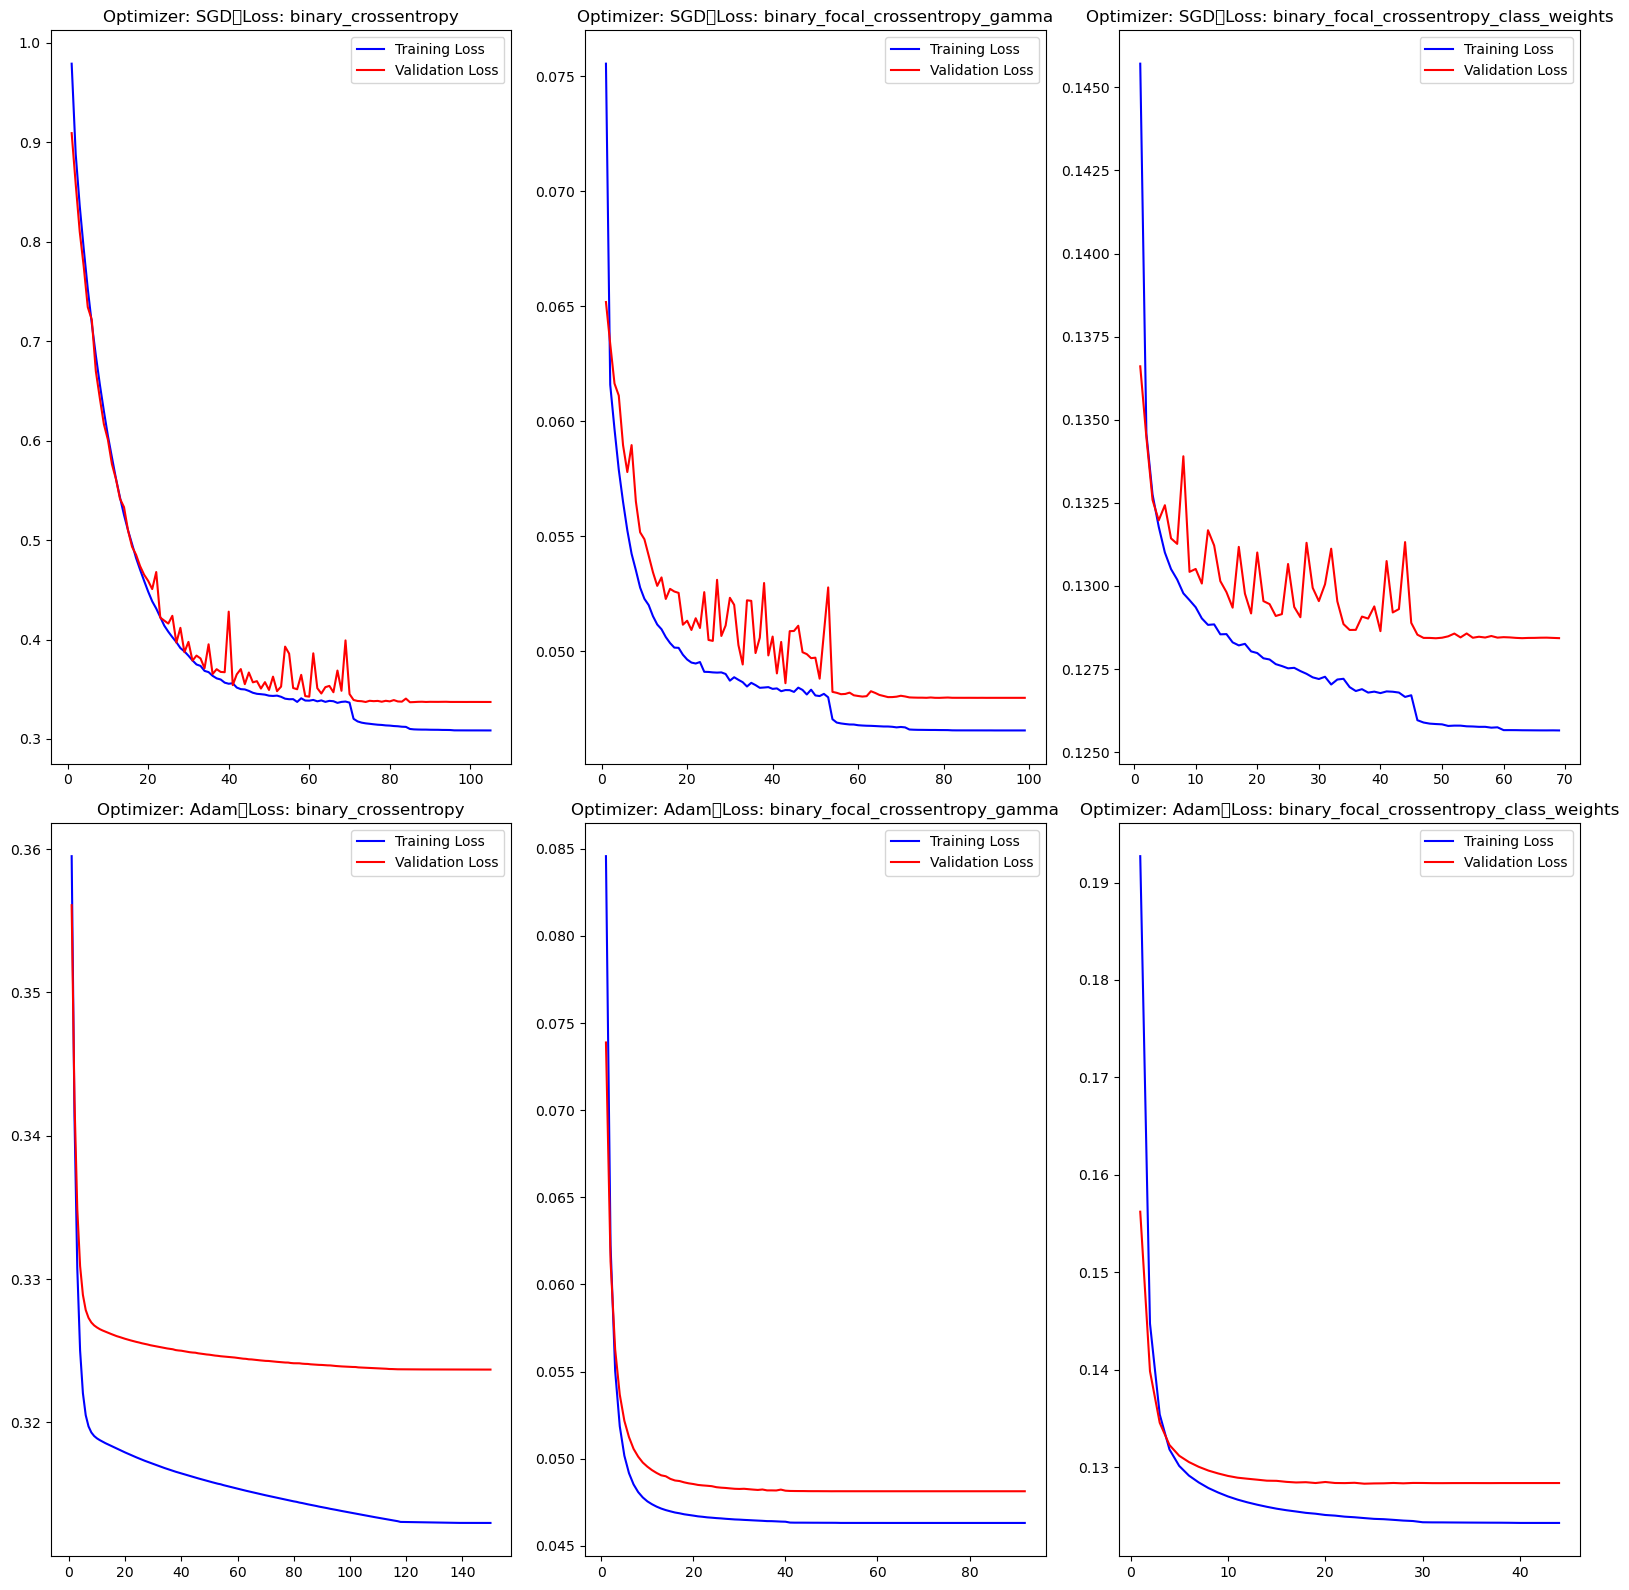

In [459]:
fig, ax = plt.subplots(2, 3, figsize=(16, 16))
ax = ax.flatten()

for i, pair in enumerate(optimizer_loss_combinations_l2):
        optimizer = pair["optimizer"]
        loss = pair["loss"]
        
        print(f'Compiling ANN with Optimizer = {optimizer.name}\nLoss function = {loss.name}')
        
        callbacks = get_callbacks(f'models/l2_model_{optimizer.name}_{loss.name}')
        hist, ann, res = run_model(ann, optimizer=optimizer, loss=loss, metrics=metrics, num_epochs=num_epochs, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val, callbacks=callbacks)
        results[f'{optimizer.name}+{loss.name}'] = res

        # plotting loss-curves
        training_losses = hist.history["loss"]
        test_losses = hist.history["val_loss"]
        epochs = np.arange(1, len(training_losses) + 1)

        ax[i].plot(epochs, training_losses, c="b", label="Training Loss")
        ax[i].plot(epochs, test_losses, c="r", label="Validation Loss")
        ax[i].set_title(f"Optimizer: {optimizer.name}\tLoss: {loss.name}")
        ax[i].legend()

fig.tight_layout()


In [460]:
print_results(results)

loss       tp      fp        tn  \
SGD+binary_crossentropy                      0.337 1840.000 625.000 10214.000   
SGD+binary_focal_crossentropy_gamma          0.048 1760.000 551.000 10288.000   
SGD+binary_focal_crossentropy_class_weights  0.128 1008.000 121.000 10718.000   
Adam+binary_crossentropy                     0.324 1798.000 585.000 10254.000   
Adam+binary_focal_crossentropy_gamma         0.048 1788.000 568.000 10271.000   
Adam+binary_focal_crossentropy_class_weights 0.128 1047.000 134.000 10705.000   

                                                   fn   acc  precision  \
SGD+binary_crossentropy                      1245.000 0.866      0.746   
SGD+binary_focal_crossentropy_gamma          1325.000 0.865      0.762   
SGD+binary_focal_crossentropy_class_weights  2077.000 0.842      0.893   
Adam+binary_crossentropy                     1287.000 0.866      0.755   
Adam+binary_focal_crossentropy_gamma         1297.000 0.866      0.759   
Adam+binary_focal_crossentropy_class_weights 2038.000 0.844      0.887   

                                              recall  auc_pr  
SGD+binary_crossentropy                        0.596   0.759  
SGD+binary_focal_crossentropy_gamma            0.571   0.757  
SGD+binary_focal_crossentropy_class_weights    0.327   0.755  
Adam+binary_crossentropy                       0.583   0.759  
Adam+binary_focal_crossentropy_gamma           0.580   0.760  
Adam+binary_focal_crossentropy_class_weights   0.339   0.759

#### L1 regularizacija

In [461]:
num_epochs = 150
results = dict()

In [462]:
optimizer_loss_combinations_l1 = (
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.1),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.SGD(learning_rate=0.01),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-6),
    "loss": tf.losses.BinaryCrossentropy()
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=False, gamma=3.0, name="binary_focal_crossentropy_gamma")
    },
    {
    "optimizer": tf.optimizers.Adam(learning_rate=1e-5),
    "loss": tf.losses.BinaryFocalCrossentropy(apply_class_balancing=True, gamma=0.0, name="binary_focal_crossentropy_class_weights")
    },
)

In [395]:
input_shape = X_train.shape[1]
reg_param = 1e-4

ann = Sequential()
ann.add(Dense(input_shape, input_shape=(input_shape,), activation="relu", kernel_regularizer=tf.keras.regularizers.l1(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(reg_param)))
ann.add(Dense(200, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(reg_param)))
ann.add(Dense(100, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(reg_param)))
ann.add(Dense(1, activation="sigmoid"))

Compiling ANN with Optimizer = SGD
Loss function = binary_crossentropy
Epoch 1/150
218/218 [==============================] - 3s 11ms/step - loss: 1.0492 - tp: 10384.0000 - fp: 4440.0000 - tn: 93104.0000 - fn: 17383.0000 - accuracy: 0.8258 - precision: 0.7005 - recall: 0.3740 - prc: 0.5971 - val_loss: 1.0393 - val_tp: 1963.0000 - val_fp: 1416.0000 - val_tn: 9423.0000 - val_fn: 1122.0000 - val_accuracy: 0.8177 - val_precision: 0.5809 - val_recall: 0.6363 - val_prc: 0.6051 - lr: 0.1000
Epoch 2/150
218/218 [==============================] - 4s 19ms/step - loss: 0.9827 - tp: 13132.0000 - fp: 5758.0000 - tn: 80947.0000 - fn: 11550.0000 - accuracy: 0.8446 - precision: 0.6952 - recall: 0.5320 - prc: 0.6715 - val_loss: 0.9687 - val_tp: 1731.0000 - val_fp: 855.0000 - val_tn: 9984.0000 - val_fn: 1354.0000 - val_accuracy: 0.8414 - val_precision: 0.6694 - val_recall: 0.5611 - val_prc: 0.6888 - lr: 0.1000
Epoch 3/150
218/218 [==============================] - 2s 9ms/step - loss: 0.9554 - tp: 13221.

/tmp/ipykernel_4766/511562039.py:24: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/uros/miniconda3/envs/ml_proj_3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


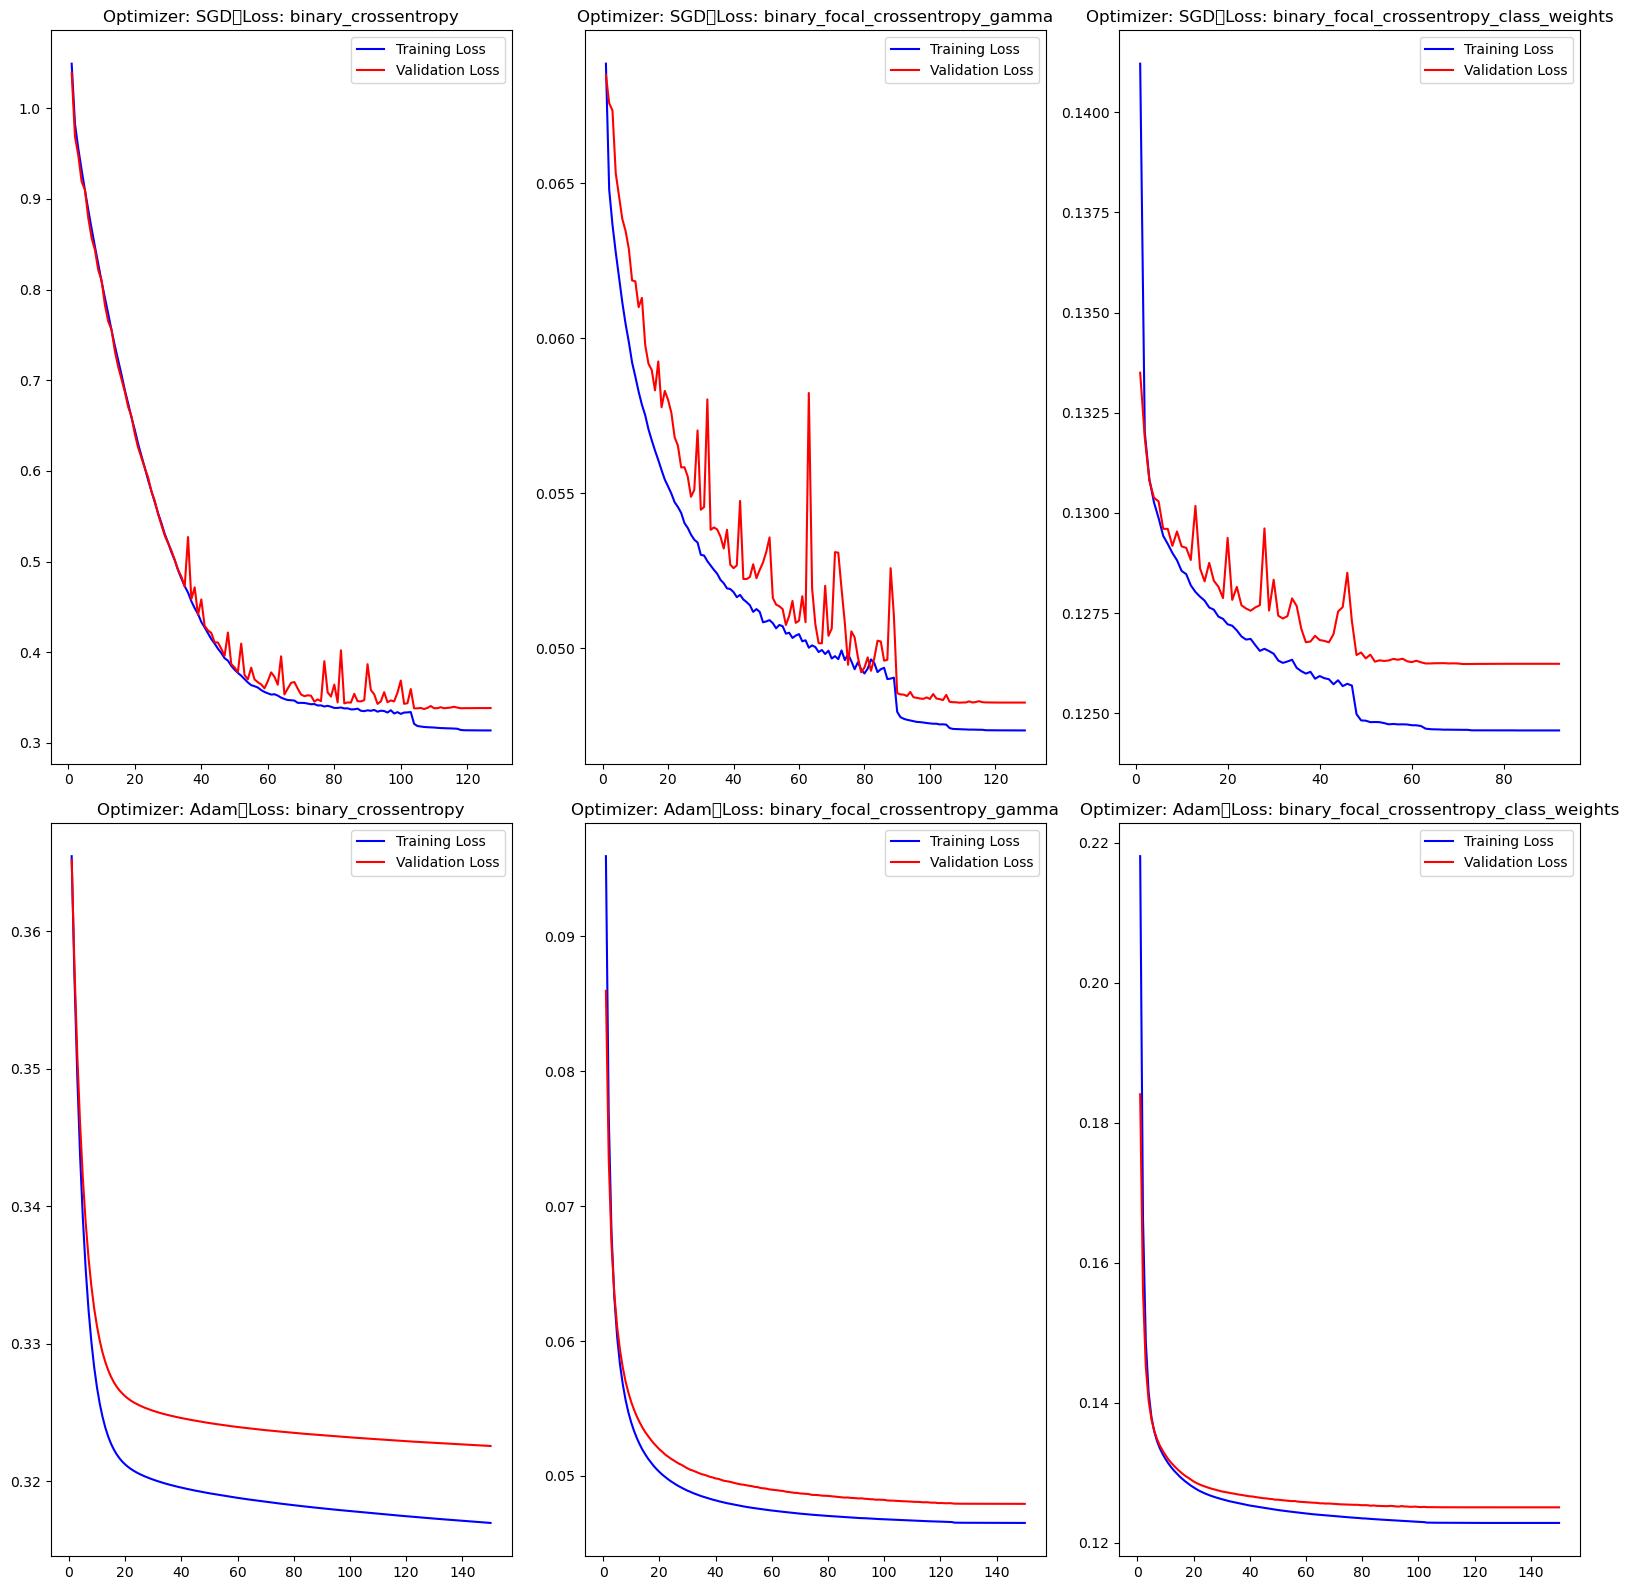

In [396]:
fig, ax = plt.subplots(2, 3, figsize=(16, 16))
ax = ax.flatten()

for i, pair in enumerate(optimizer_loss_combinations_l1):
        optimizer = pair["optimizer"]
        loss = pair["loss"]
        
        print(f'Compiling ANN with Optimizer = {optimizer.name}\nLoss function = {loss.name}')
        
        callbacks = get_callbacks(f'models/l1_model_{optimizer.name}_{loss.name}')
        hist, ann, res = run_model(ann, optimizer=optimizer, loss=loss, metrics=metrics, num_epochs=num_epochs, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val, callbacks=callbacks)
        results[f'{optimizer.name}+{loss.name}'] = res

        # plotting loss-curves
        training_losses = hist.history["loss"]
        test_losses = hist.history["val_loss"]
        epochs = np.arange(1, len(training_losses) + 1)

        ax[i].plot(epochs, training_losses, c="b", label="Training Loss")
        ax[i].plot(epochs, test_losses, c="r", label="Validation Loss")
        ax[i].set_title(f"Optimizer: {optimizer.name}\tLoss: {loss.name}")
        ax[i].legend()

fig.tight_layout()


In [397]:
print_results(results)

loss       tp      fp        tn  \
SGD+binary_crossentropy                      0.337 1849.000 618.000 10221.000   
SGD+binary_focal_crossentropy_gamma          0.048 1774.000 556.000 10283.000   
SGD+binary_focal_crossentropy_class_weights  0.126 1052.000 123.000 10716.000   
Adam+binary_crossentropy                     0.323 1767.000 553.000 10286.000   
Adam+binary_focal_crossentropy_gamma         0.048 1794.000 595.000 10244.000   
Adam+binary_focal_crossentropy_class_weights 0.125 1094.000 133.000 10706.000   

                                                   fn   acc  precision  \
SGD+binary_crossentropy                      1236.000 0.867      0.749   
SGD+binary_focal_crossentropy_gamma          1311.000 0.866      0.761   
SGD+binary_focal_crossentropy_class_weights  2033.000 0.845      0.895   
Adam+binary_crossentropy                     1318.000 0.866      0.762   
Adam+binary_focal_crossentropy_gamma         1291.000 0.865      0.751   
Adam+binary_focal_crossentropy_class_weights 1991.000 0.847      0.892   

                                              recall  auc_pr  
SGD+binary_crossentropy                        0.599   0.761  
SGD+binary_focal_crossentropy_gamma            0.575   0.757  
SGD+binary_focal_crossentropy_class_weights    0.341   0.757  
Adam+binary_crossentropy                       0.573   0.758  
Adam+binary_focal_crossentropy_gamma           0.582   0.760  
Adam+binary_focal_crossentropy_class_weights   0.355   0.762

## Evaluacija na test set-u

In [110]:
best_l2 = tf.keras.models.load_model('models/l2_model_SGD_binary_crossentropy')

best_l2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 110)               12210     
                                                                 
 dense_36 (Dense)            (None, 200)               22200     
                                                                 
 dense_37 (Dense)            (None, 200)               40200     
                                                                 
 dense_38 (Dense)            (None, 100)               20100     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 94,811
Trainable params: 94,811
Non-trainable params: 0
_________________________________________________________________


In [128]:
Y_pred = best_l2.predict(X_test)

 88/436 [=====>........................] - ETA: 0s

436/436 [==============================] - 0s 679us/step


In [129]:
apply_treshhold = np.vectorize(lambda x: 1 if x > 0.5 else 0)
Y_pred_t = apply_treshhold(Y_pred)

In [131]:
print(metrics.classification_report(Y_test, Y_pred_t))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10838
           1       0.76      0.59      0.66      3085

    accuracy                           0.87     13923
   macro avg       0.82      0.77      0.79     13923
weighted avg       0.86      0.87      0.86     13923



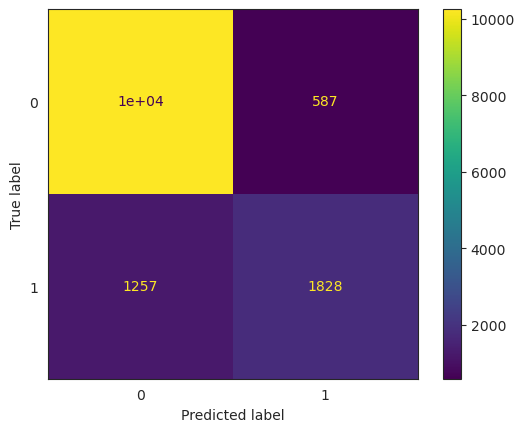

In [132]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_t)
conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
sns.set_style("white")
conf_mat_display.plot()

In [135]:
best_custom = tf.keras.models.load_model('models/l2_model_SGD_custom_loss', custom_objects={"custom_loss": custom_loss})

best_custom.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 110)               12210     
                                                                 
 dense_61 (Dense)            (None, 200)               22200     
                                                                 
 dense_62 (Dense)            (None, 200)               40200     
                                                                 
 dense_63 (Dense)            (None, 100)               20100     
                                                                 
 dense_64 (Dense)            (None, 1)                 101       
                                                                 
Total params: 94,811
Trainable params: 94,811
Non-trainable params: 0
_________________________________________________________________


In [137]:
Y_pred = best_custom.predict(X_test)

  1/436 [..............................] - ETA: 25s

436/436 [==============================] - 0s 654us/step


In [138]:
apply_treshhold = np.vectorize(lambda x: 1 if x > 0.5 else 0)
Y_pred_t = apply_treshhold(Y_pred)

In [139]:
print(metrics.classification_report(Y_test, Y_pred_t))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10838
           1       0.69      0.69      0.69      3085

    accuracy                           0.86     13923
   macro avg       0.80      0.80      0.80     13923
weighted avg       0.86      0.86      0.86     13923



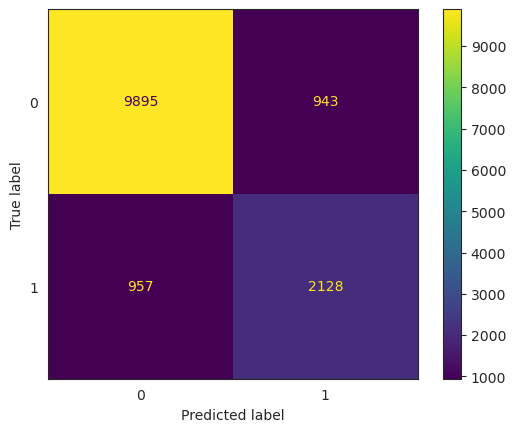

In [140]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_t)
conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
sns.set_style("white")
conf_mat_display.plot()